In [325]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
import seaborn as sns

## state_metrics.csv
**Purpose:** Provides pre-aggregated state-level statistics summarizing diversity, participation, and success indicators.  
Useful for dashboards and choropleth maps.

| Column | Description | Example |
|---------|--------------|----------|
| `state` | State abbreviation | WI |
| `total_candidates` | Total number of candidates in that state | 36 |
| `%_BIPOC` | Percentage of candidates identifying as BIPOC (non-White) | 47.2 |
| `%_Women` | Percentage of candidates identifying as women | 56.1 |
| `%_LGBTQ+` | Percentage of candidates identifying as LGBTQ+ | 14.5 |
| `active_programs` | Number of currently active training programs in the state | 9 |
| `avg_program_participation` | Average number of programs completed per candidate | 1.8 |
| `win_rate` | Percentage of candidates who have won at least one campaign | 34.7 |

In [326]:
state_metrics = pd.read_csv('state_metrics.csv')

state_metrics.head()

,state,total_candidates,%_BIPOC,%_Women,%_LGBTQ+,active_programs,avg_program_participation,win_rate
0,AZ,45,55.6,51.1,15.6,0,2.91,38.1
1,CO,34,44.1,47.1,23.5,1,2.44,60.0
2,FL,82,70.7,46.3,12.2,2,2.71,36.7
3,GA,88,68.2,44.3,8.0,2,2.40,27.5
4,IL,36,47.2,44.4,16.7,2,2.50,52.9


In [327]:
state_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state                      19 non-null     object 
 1   total_candidates           19 non-null     int64  
 2   %_BIPOC                    19 non-null     float64
 3   %_Women                    19 non-null     float64
 4   %_LGBTQ+                   19 non-null     float64
 5   active_programs            19 non-null     int64  
 6   avg_program_participation  19 non-null     float64
 7   win_rate                   19 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ KB


## campaigns.csv
**Purpose:** Records election performance data for candidates who have run for office.  
Used to analyze outcomes and measure the impact of training or program participation.

| Column | Description | Example |
|---------|--------------|----------|
| `campaign_id` | Unique campaign identifier | CMP0291 |
| `candidate_id` | Foreign key linking to `candidates.candidate_id` | CND123 |
| `office_level` | Level of the office contested | Local / State / Federal |
| `year` | Election year | 2024 |
| `state` | State where the campaign took place | WI |
| `votes_received` | Number of votes received by the candidate | 13,402 |
| `total_votes` | Total votes cast in that race | 25,612 |
| `party` | Political or organizational affiliation | Democrat / Independent / Progressive / Nonpartisan |
| `won` | Whether the candidate won the race | True / False |

In [328]:
campaigns = pd.read_csv('campaigns.csv')
campaigns.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False


In [329]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     450 non-null    object
 1   candidate_id    450 non-null    object
 2   office_level    450 non-null    object
 3   year            450 non-null    int64 
 4   state           450 non-null    object
 5   votes_received  450 non-null    int64 
 6   total_votes     450 non-null    int64 
 7   party           450 non-null    object
 8   won             450 non-null    bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 28.7+ KB


## participation.csv
**Purpose:** Tracks which candidates have participated in which programs, their completion status, and satisfaction feedback.  
This is a **many-to-many link table** between `candidates` and `programs`.

| Column | Description | Example |
|---------|--------------|----------|
| `participant_id` | Unique participation record ID | PTC01745 |
| `candidate_id` | Foreign key linking to `candidates.candidate_id` | CND123 |
| `program_id` | Foreign key linking to `programs.program_id` | PRG083 |
| `completion_status` | Candidate’s status in the program | Completed / Dropped / In Progress |
| `score` | Final program assessment score (0–100) for completed participants | 88 |
| `feedback_rating` | Participant satisfaction rating (1–5 scale) | 4.6 |

In [330]:
participation = pd.read_csv('participation.csv')

participation.head()

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0


## partners.csv
**Purpose:** Lists all state and national partner organizations that recruit, train, or support candidates.

| Column | Description | Example |
|---------|--------------|----------|
| `partner_id` | Unique partner organization ID | PAR012 |
| `partner_name` | Name of the partner organization | Georgia Rising Leaders |
| `state` | State where the organization operates or is headquartered | GA |
| `focus_area` | Primary area of focus for the organization | Candidate Training / Civic Engagement / Youth Leadership / Policy Advocacy |
| `org_type` | Legal type of organization | 501(c)(3) / 501(c)(4) / Nonprofit Coalition |
| `founded_year` | Year the organization was established | 2018 |

In [331]:
partners = pd.read_csv('partners.csv')

partners.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012
1,PAR002,WI Rising Leaders,WI,Candidate Training,Nonprofit Coalition,2018
2,PAR003,WI Future Leaders,WI,Candidate Training,501(c)(3),2012
3,PAR004,WI Forward Network,WI,Candidate Training,Nonprofit Coalition,2011
4,PAR005,MI Forward Alliance,MI,Civic Engagement,501(c)(4),2023


In [332]:
partners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   partner_id    76 non-null     object
 1   partner_name  76 non-null     object
 2   state         76 non-null     object
 3   focus_area    76 non-null     object
 4   org_type      76 non-null     object
 5   founded_year  76 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 3.7+ KB


##  programs.csv
**Purpose:** Contains details about each training or support program offered by partner organizations.

| Column | Description | Example |
|---------|--------------|----------|
| `program_id` | Unique program ID | PRG0083 |
| `partner_id` | Foreign key linking to `partners.partner_id` | PAR012 |
| `program_name` | Title of the program | Leaders of Tomorrow Fellowship |
| `type` | Program category or format | Fellowship / Bootcamp / Mentorship / Workshop |
| `start_date` | Program start date | 2023-03-10 |
| `end_date` | Program end date | 2023-08-20 |
| `participants_count` | Number of participants enrolled | 45 |
| `active` | Whether the program is currently running | True / False |

In [333]:
programs = pd.read_csv('programs.csv')

programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active
0,PRG0001,PAR001,Campaign Bootcamp,Bootcamp,2022-03-23,2022-07-22,28,False
1,PRG0002,PAR001,Organizing Workshop,Workshop,2023-12-26,2024-08-11,34,False
2,PRG0003,PAR001,Campaign Bootcamp,Workshop,2023-04-30,2023-07-10,18,False
3,PRG0004,PAR001,Civic Fellows,Workshop,2023-01-03,2023-08-09,46,False
4,PRG0005,PAR002,Leaders of Tomorrow,Workshop,2022-11-23,2023-07-12,19,False


In [334]:
programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   program_id          258 non-null    object
 1   partner_id          258 non-null    object
 2   program_name        258 non-null    object
 3   type                258 non-null    object
 4   start_date          258 non-null    object
 5   end_date            258 non-null    object
 6   participants_count  258 non-null    int64 
 7   active              258 non-null    bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 14.5+ KB


In [335]:
# converting start and end date to datetime

programs['start_date'] = pd.to_datetime(programs['start_date'])

programs['end_date'] = pd.to_datetime(programs['end_date'])

programs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   program_id          258 non-null    object        
 1   partner_id          258 non-null    object        
 2   program_name        258 non-null    object        
 3   type                258 non-null    object        
 4   start_date          258 non-null    datetime64[ns]
 5   end_date            258 non-null    datetime64[ns]
 6   participants_count  258 non-null    int64         
 7   active              258 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(4)
memory usage: 14.5+ KB


## candidates.csv
**Purpose:** Contains information on every candidate in the leadership pipeline — including demographics, training status, and organizational affiliation.

| Column | Description | Example |
|---------|--------------|----------|
| `candidate_id` | Unique candidate identifier | CND0045 |
| `name` | Candidate’s full name (synthetic) | Jordan Patel |
| `state` | Two-letter state abbreviation where the candidate resides or ran for office | WI |
| `race_ethnicity` | Candidate’s self-identified race or ethnicity | Black / Latinx / White / AAPI / Indigenous / Multiracial |
| `gender` | Candidate’s gender identity | Woman / Man / Nonbinary |
| `age` | Candidate’s age in years | 34 |
| `office_level` | The level of political office pursued | Local / State / Federal |
| `training_completed` | Whether the candidate completed a formal training program | True / False |
| `election_outcome` | Most recent election result | Won / Lost / TBD |
| `partner_id` | Foreign key linking to `partners.partner_id` (the organization supporting this candidate) | PAR012 |

In [336]:
candidates = pd.read_csv('candidates.csv')

candidates.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040


In [337]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   candidate_id        1000 non-null   object
 1   name                1000 non-null   object
 2   state               1000 non-null   object
 3   race_ethnicity      1000 non-null   object
 4   gender              1000 non-null   object
 5   age                 1000 non-null   int64 
 6   office_level        1000 non-null   object
 7   training_completed  1000 non-null   bool  
 8   election_outcome    1000 non-null   object
 9   partner_id          1000 non-null   object
dtypes: bool(1), int64(1), object(8)
memory usage: 71.4+ KB


### Checking for duplicate values

In [338]:
campaigns.duplicated().sum()

0

In [339]:
participation.duplicated().sum()

0

In [340]:
programs.duplicated().sum()

0

In [341]:
candidates.duplicated().sum()

0

In [342]:
partners.duplicated().sum()

0

In [343]:
state_metrics.duplicated().sum()

0

## 🧭 Candidate Landscape

**Goal:** Understand who’s in the leadership pipeline and how representation varies across states and partner organizations.

**Focus & Example Questions**
- **Demographics**
  - What percentage of all candidates identify as BIPOC, women, or nonbinary?
  - How do those percentages differ by state?
  - Which partners have the most diverse candidate pipelines?
- **Training Completion**
  - What percent of candidates have completed training?
  - Are completion rates higher in certain states or partner organizations?
  - Do training completion rates differ by gender or race?
- **Office Level Focus**
  - What share of candidates are pursuing Local vs State vs Federal office?
  - Do demographics shift with higher office levels?


In [344]:
# merging candidates and partners dataframs

cand_partners = candidates.merge(partners, how='left', on='partner_id')

cand_partners.head()

,candidate_id,name,state_x,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,partner_name,state_y,focus_area,org_type,founded_year
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,MO Forward Leaders,MO,Youth Leadership,Nonprofit Coalition,2022
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NC Civic Leaders,NC,Civic Engagement,Nonprofit Coalition,2012
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,NC Civic Leaders,NC,Civic Engagement,Nonprofit Coalition,2012
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,OR Civic Leaders,OR,Candidate Training,Nonprofit Coalition,2018
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040,NC Future Leaders,NC,Candidate Training,501(c)(3),2007


In [345]:
cand_partners.groupby('gender')['gender'].count()

gender
Man          478
Nonbinary     48
Woman        474
Name: gender, dtype: int64

In [346]:
cand_partners = cand_partners.drop('state_y', axis=1)

In [347]:
cand_partners.head()

,candidate_id,name,state_x,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,partner_name,focus_area,org_type,founded_year
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,MO Forward Leaders,Youth Leadership,Nonprofit Coalition,2022
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NC Civic Leaders,Civic Engagement,Nonprofit Coalition,2012
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,NC Civic Leaders,Civic Engagement,Nonprofit Coalition,2012
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,OR Civic Leaders,Candidate Training,Nonprofit Coalition,2018
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040,NC Future Leaders,Candidate Training,501(c)(3),2007


In [348]:
# renaming state_x
cand_partners.rename(columns={'state_x': 'state'}, inplace=True)

In [349]:
state_rep = cand_partners.groupby('state')['race_ethnicity'].value_counts(normalize=True).unstack().fillna(0)

state_rep.head()

race_ethnicity,AAPI,Black,Indigenous,Latinx,Multiracial,White
state,,,,,,
AZ,0.111111,0.111111,0.022222,0.266667,0.044444,0.444444
CO,0.029412,0.088235,0.058824,0.235294,0.029412,0.558824
FL,0.146341,0.158537,0.024390,0.280488,0.097561,0.292683
GA,0.102273,0.306818,0.000000,0.181818,0.090909,0.318182
IL,0.083333,0.138889,0.083333,0.111111,0.055556,0.527778


## What percentage of all candidates identify as BIPOC, women, or nonbinary?

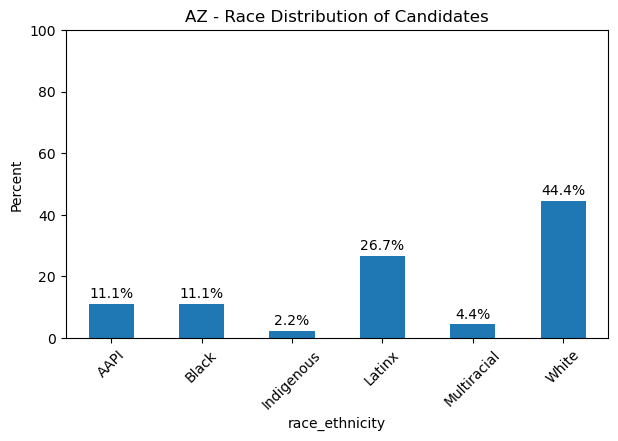

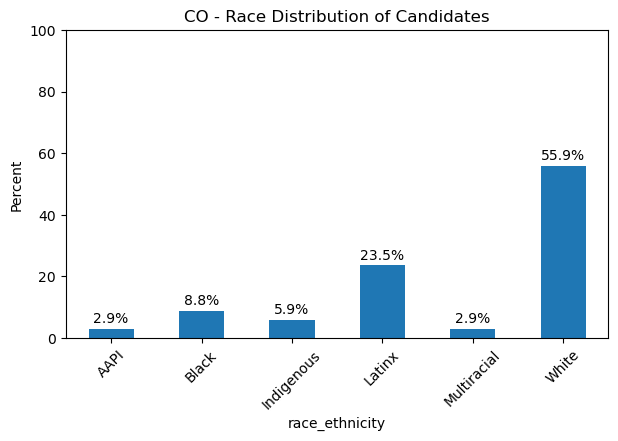

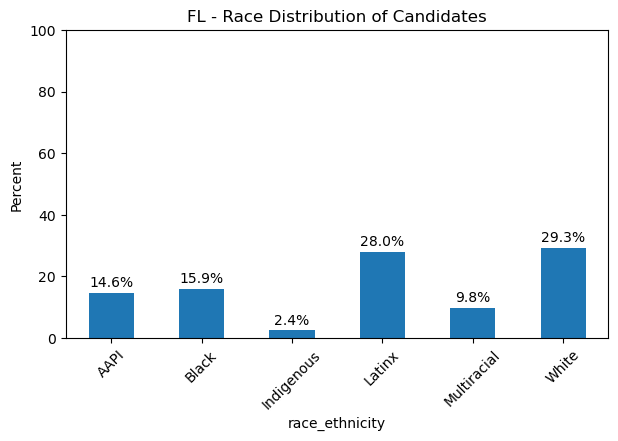

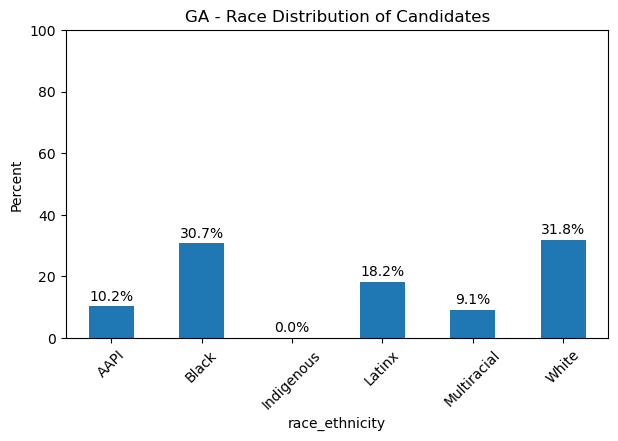

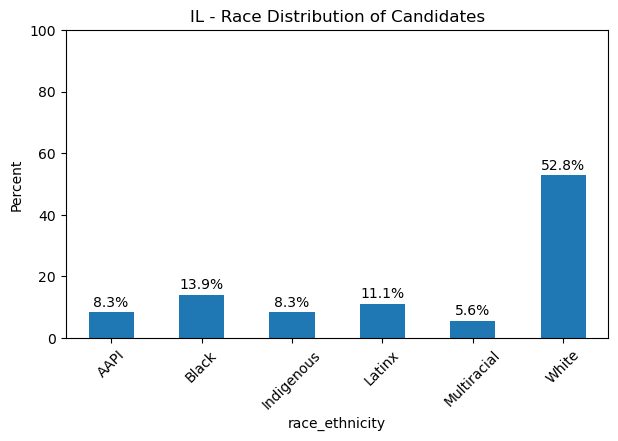

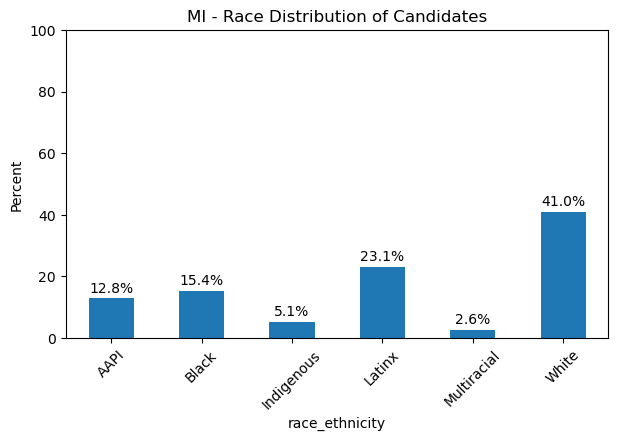

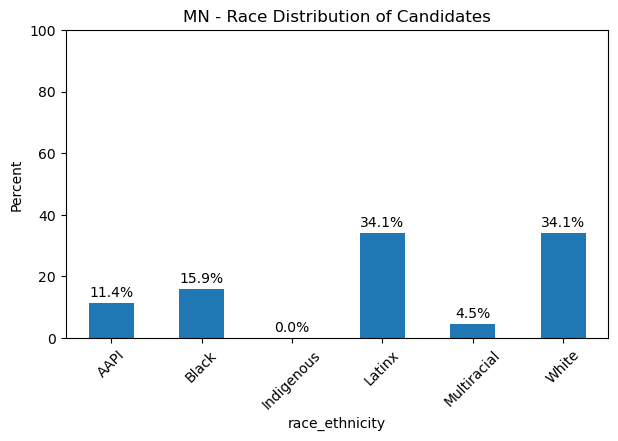

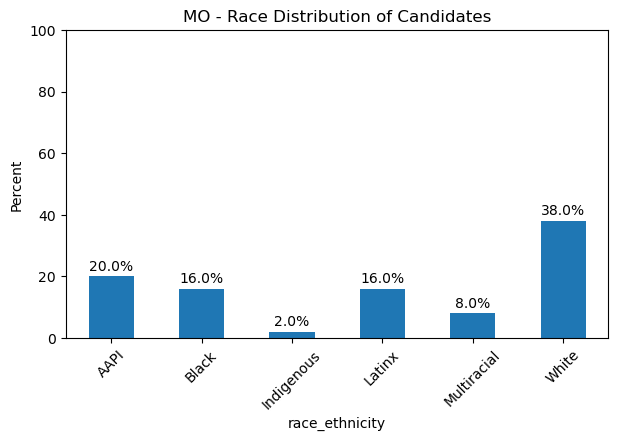

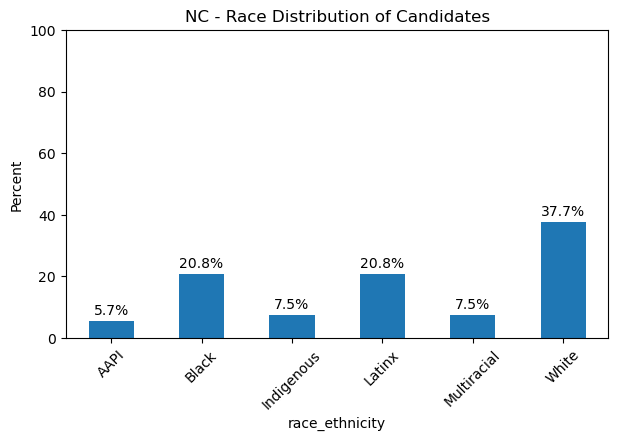

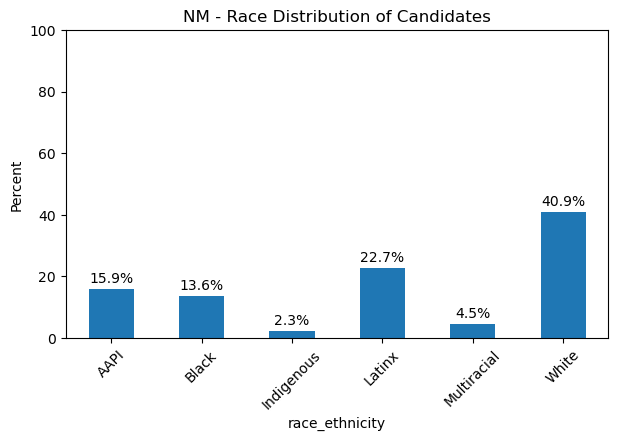

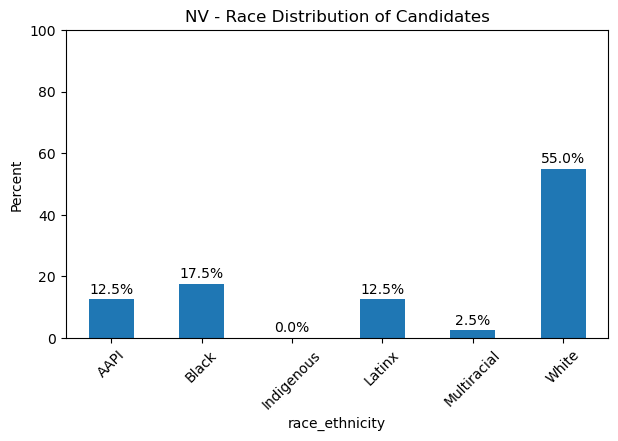

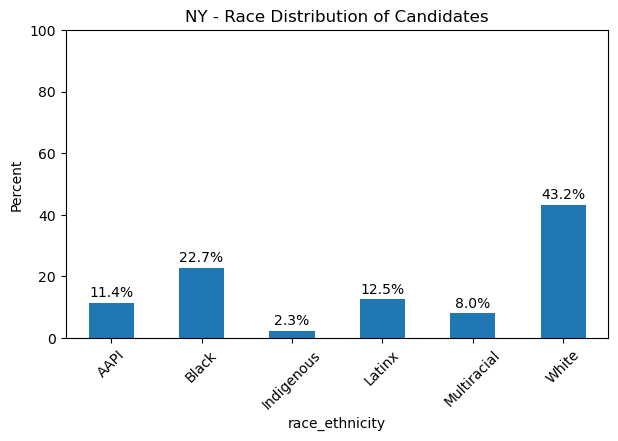

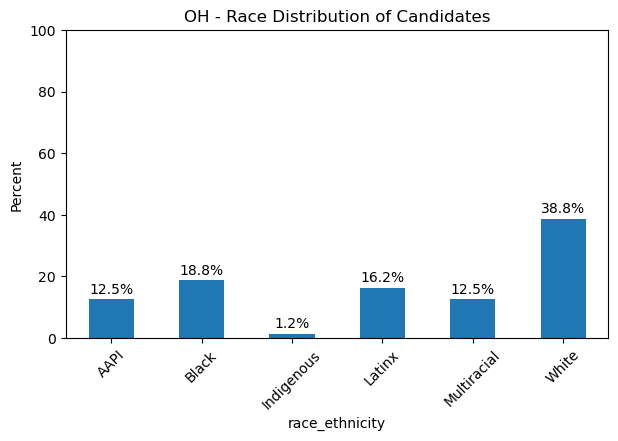

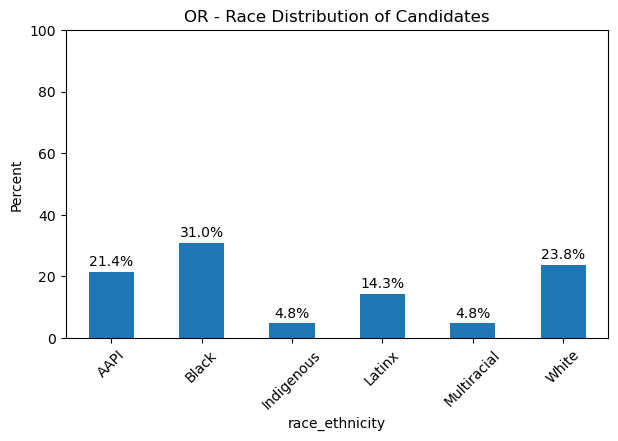

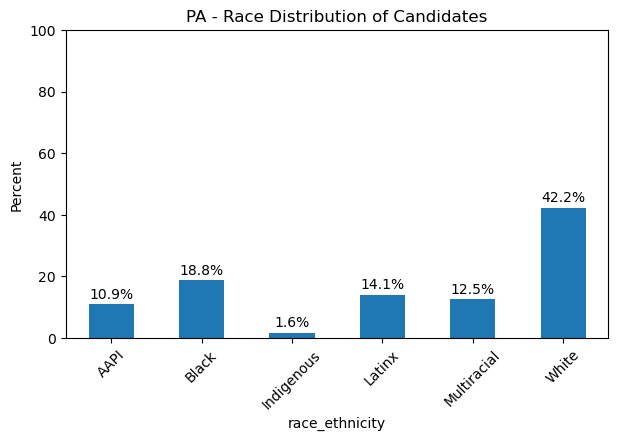

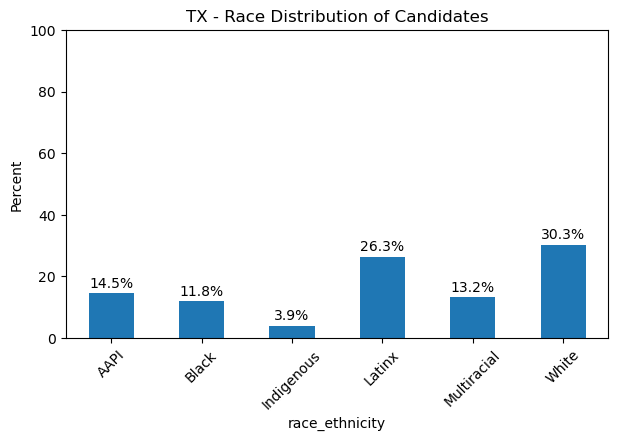

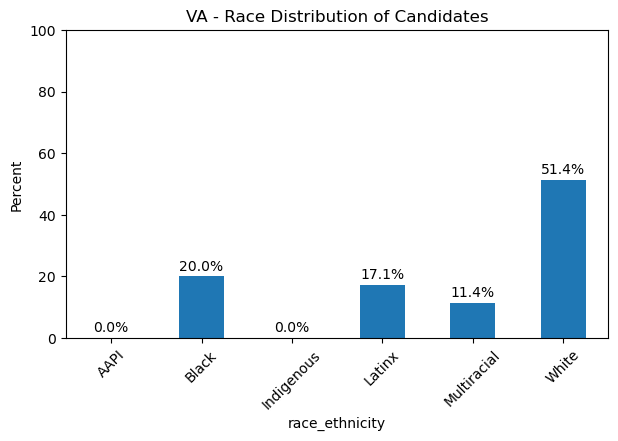

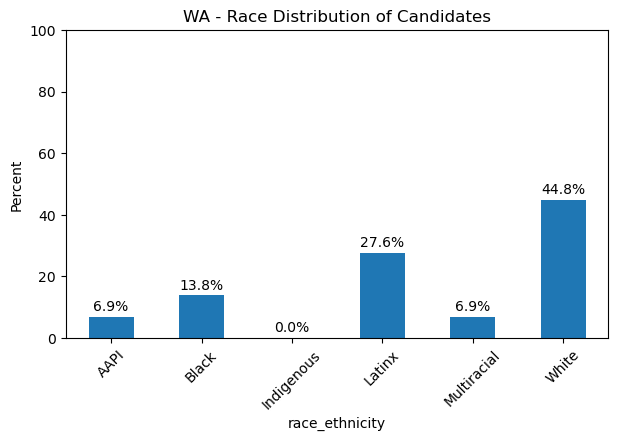

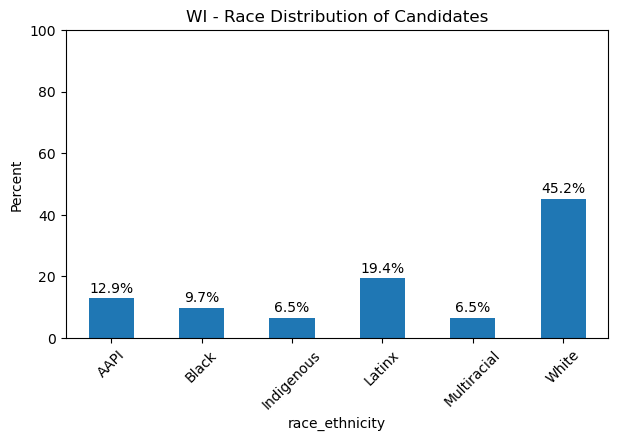

In [350]:
for state, row in state_rep.iterrows():
    plt.figure(figsize=(7,4))
    plt.title(f"{state} - Race Distribution of Candidates")
    (row*100).plot(kind='bar')
    plt.ylabel('Percent')
    plt.ylim(0, 100)
    plt.xticks(rotation=45)
    # label bars
    for i, v in enumerate(row.values*100):
        plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom')

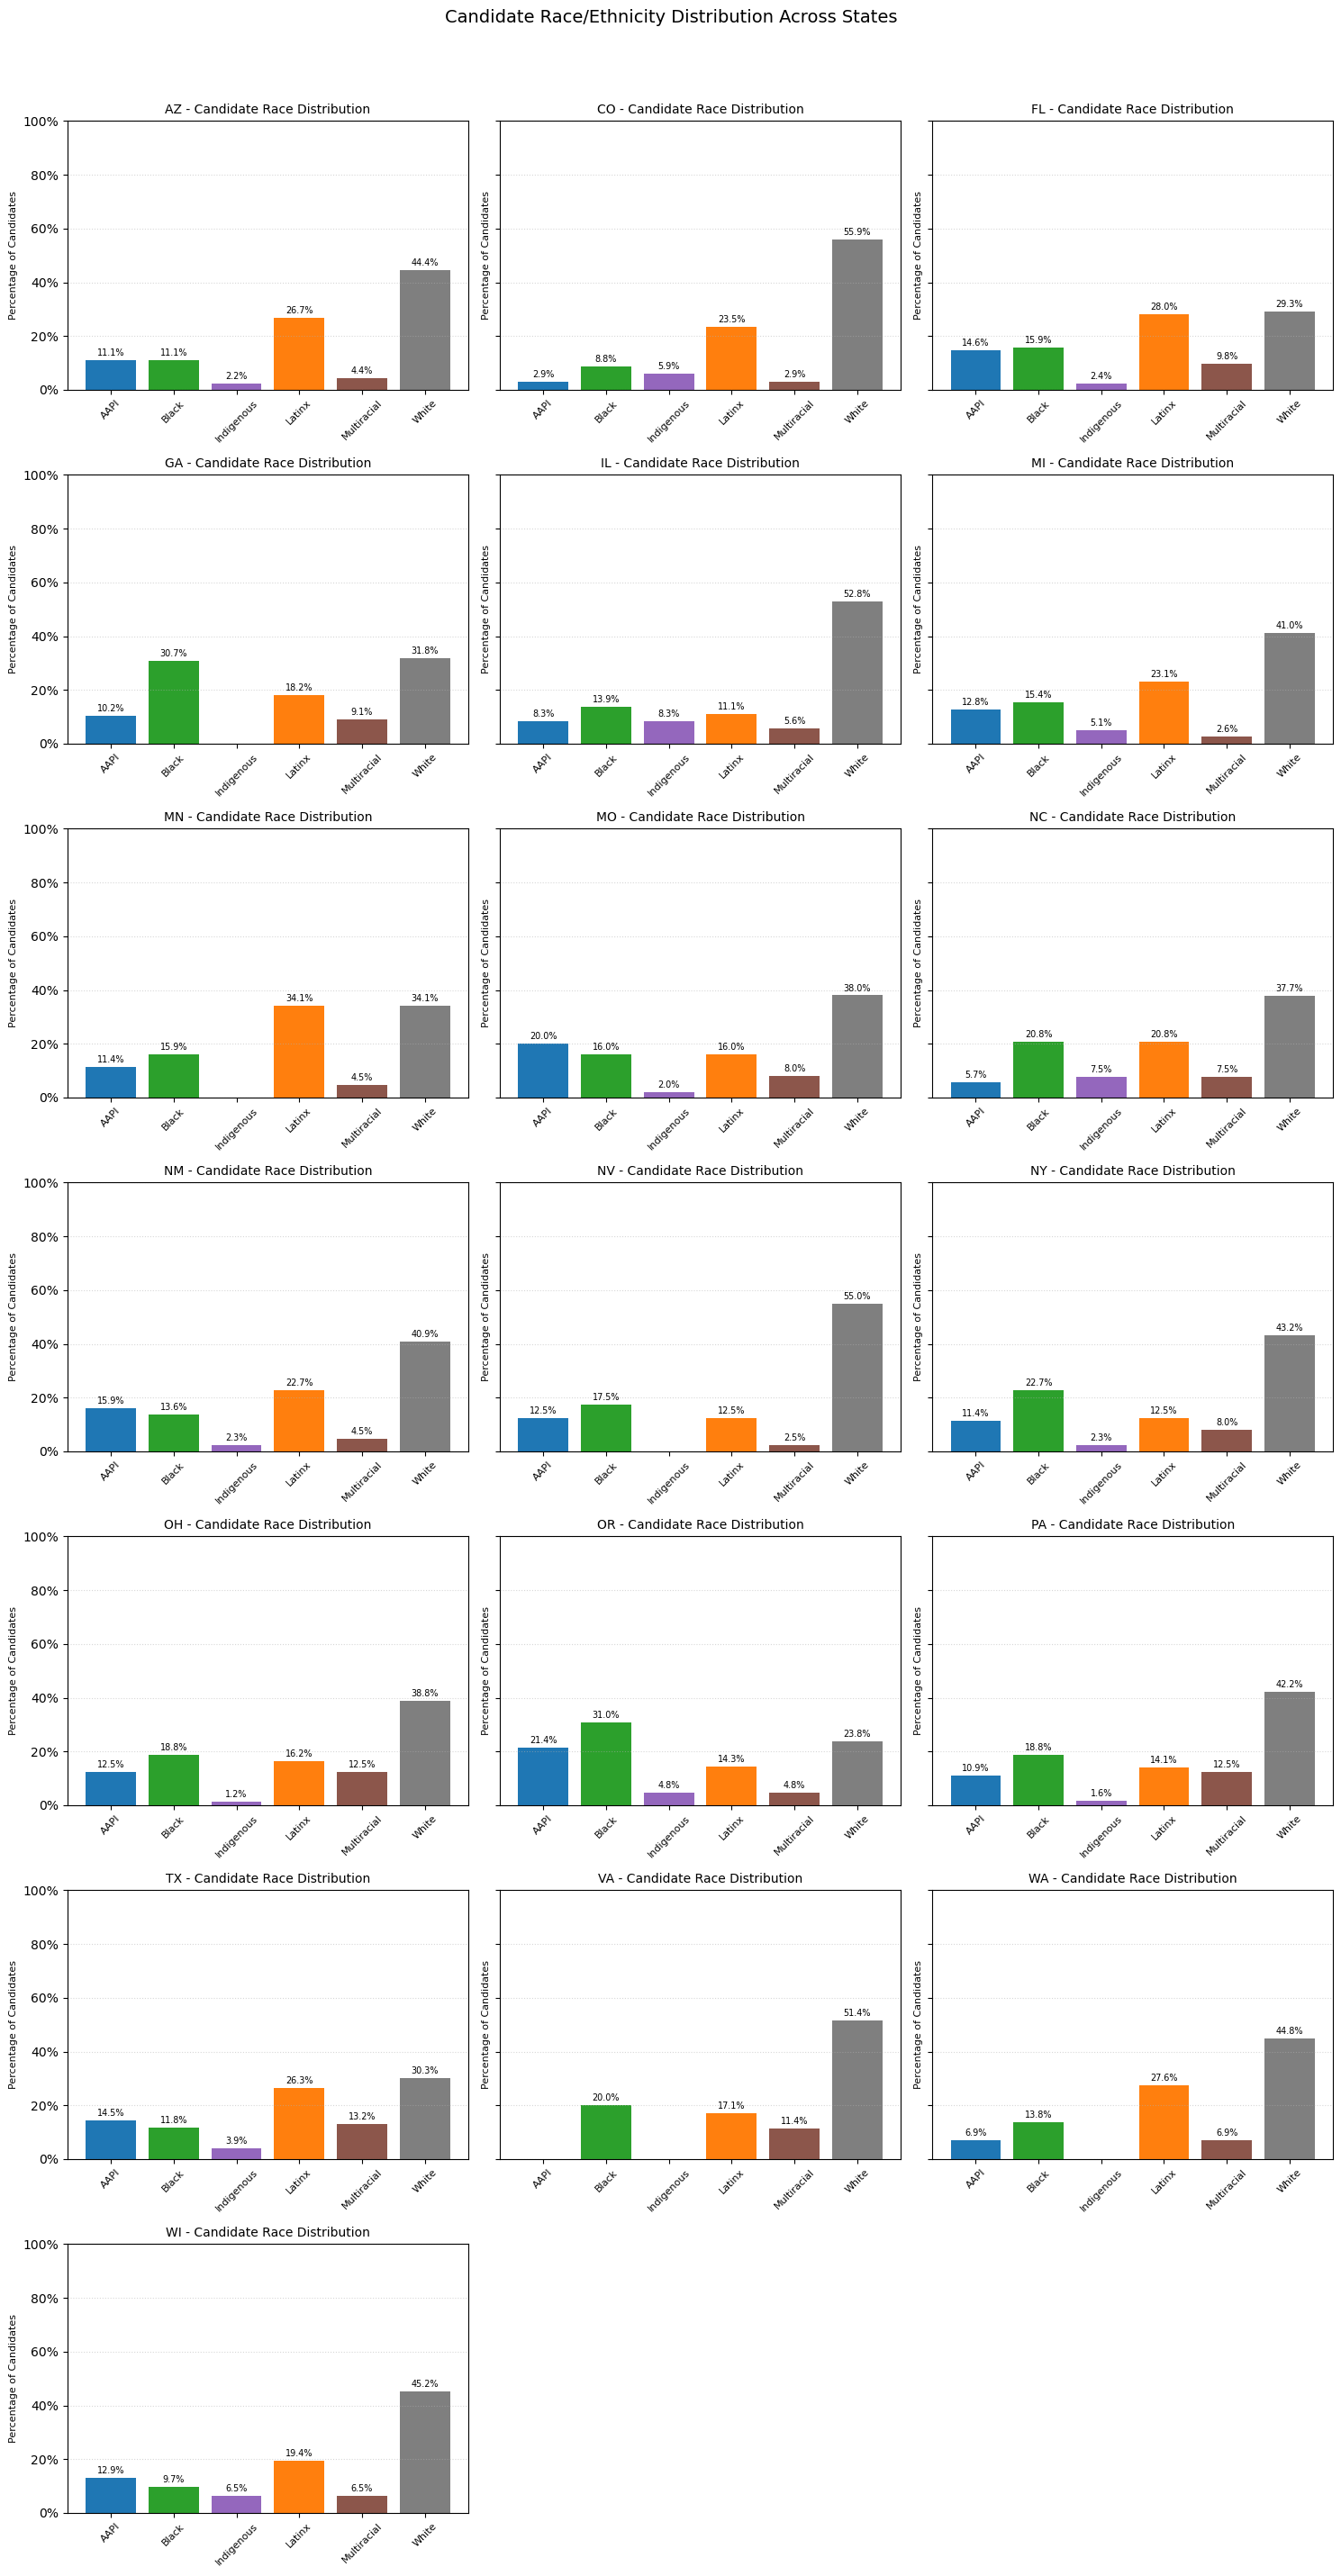

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math

# Fixed order for bars and colors
race_order = ['AAPI','Black','Indigenous','Latinx','Multiracial','White']
race_colors = ['#1f77b4','#2ca02c','#9467bd','#ff7f0e','#8c564b','#7f7f7f']


states = state_rep.index.unique()
num_states = len(states)
cols = 3
rows = math.ceil(num_states / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True, squeeze=False)

# Loop and plot
for i, st in enumerate(states):
    ax = axes.flat[i]
    sub = state_rep.loc[st].reindex(race_order, fill_value=0) # Get data and fix order

    # Plot the bar chart
    ax.bar(sub.index, sub.values*100, color=race_colors)

    # Apply formatting
    ax.set_title(f"{st} - Candidate Race Distribution", fontsize=10)
    ax.set_ylim(0, 100)
    ax.set_ylabel('Percentage of Candidates', fontsize=8)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', linestyle=':', alpha=0.5)

    # Label bars
    for j, v in enumerate(sub.values*100):
        if v > 1:
            ax.text(j, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=7)

# Turn off unused axes
for j in range(num_states, rows * cols):
    axes.flat[j].axis('off')

fig.suptitle('Candidate Race/Ethnicity Distribution Across States', y=1.02, fontsize=14)
fig.tight_layout()

## How do those percentages differ by state? (looking at share of BIPOC candidates by state)

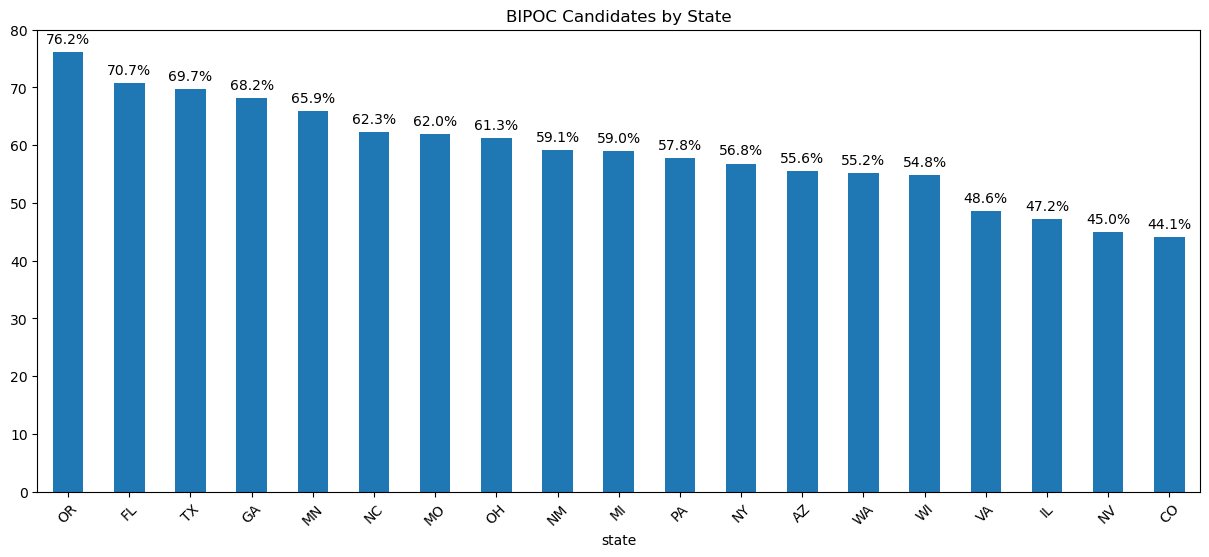

In [352]:
bipoc_share = (cand_partners[cand_partners['race_ethnicity'] != 'White']
    .groupby('state')['candidate_id'].count() / cand_partners.groupby('state')['candidate_id'].count()*100
)

ax = bipoc_share.sort_values(ascending=False).plot(kind='bar', figsize=(15,6), title='BIPOC Candidates by State')
plt.xticks(rotation=45)

for bar in ax.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    ax.text(x, y + 1, f"{y:.1f}%", ha='center', va='bottom')




In [353]:
cand_partners.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,partner_name,focus_area,org_type,founded_year
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,MO Forward Leaders,Youth Leadership,Nonprofit Coalition,2022
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NC Civic Leaders,Civic Engagement,Nonprofit Coalition,2012
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,NC Civic Leaders,Civic Engagement,Nonprofit Coalition,2012
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,OR Civic Leaders,Candidate Training,Nonprofit Coalition,2018
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040,NC Future Leaders,Candidate Training,501(c)(3),2007


## Which partners have the most diverse candidate pipelines?

In [354]:
partner_race = (cand_partners.groupby(['state', 'partner_name'])['race_ethnicity']
                .value_counts(normalize=True)
                .unstack()
                .fillna(0))

partner_race = partner_race.reset_index()

partner_race.head()

race_ethnicity,state,partner_name,AAPI,Black,Indigenous,Latinx,Multiracial,White
0,AZ,AZ Forward Leaders,0.187500,0.125000,0.062500,0.187500,0.000000,0.437500
1,AZ,AZ Future Coalition,0.181818,0.090909,0.000000,0.272727,0.090909,0.363636
2,AZ,AZ Future Network,0.000000,0.000000,0.000000,0.500000,0.100000,0.400000
3,AZ,AZ Unity Network,0.000000,0.250000,0.000000,0.125000,0.000000,0.625000
4,CO,CO Forward Alliance,0.000000,0.285714,0.142857,0.142857,0.000000,0.428571


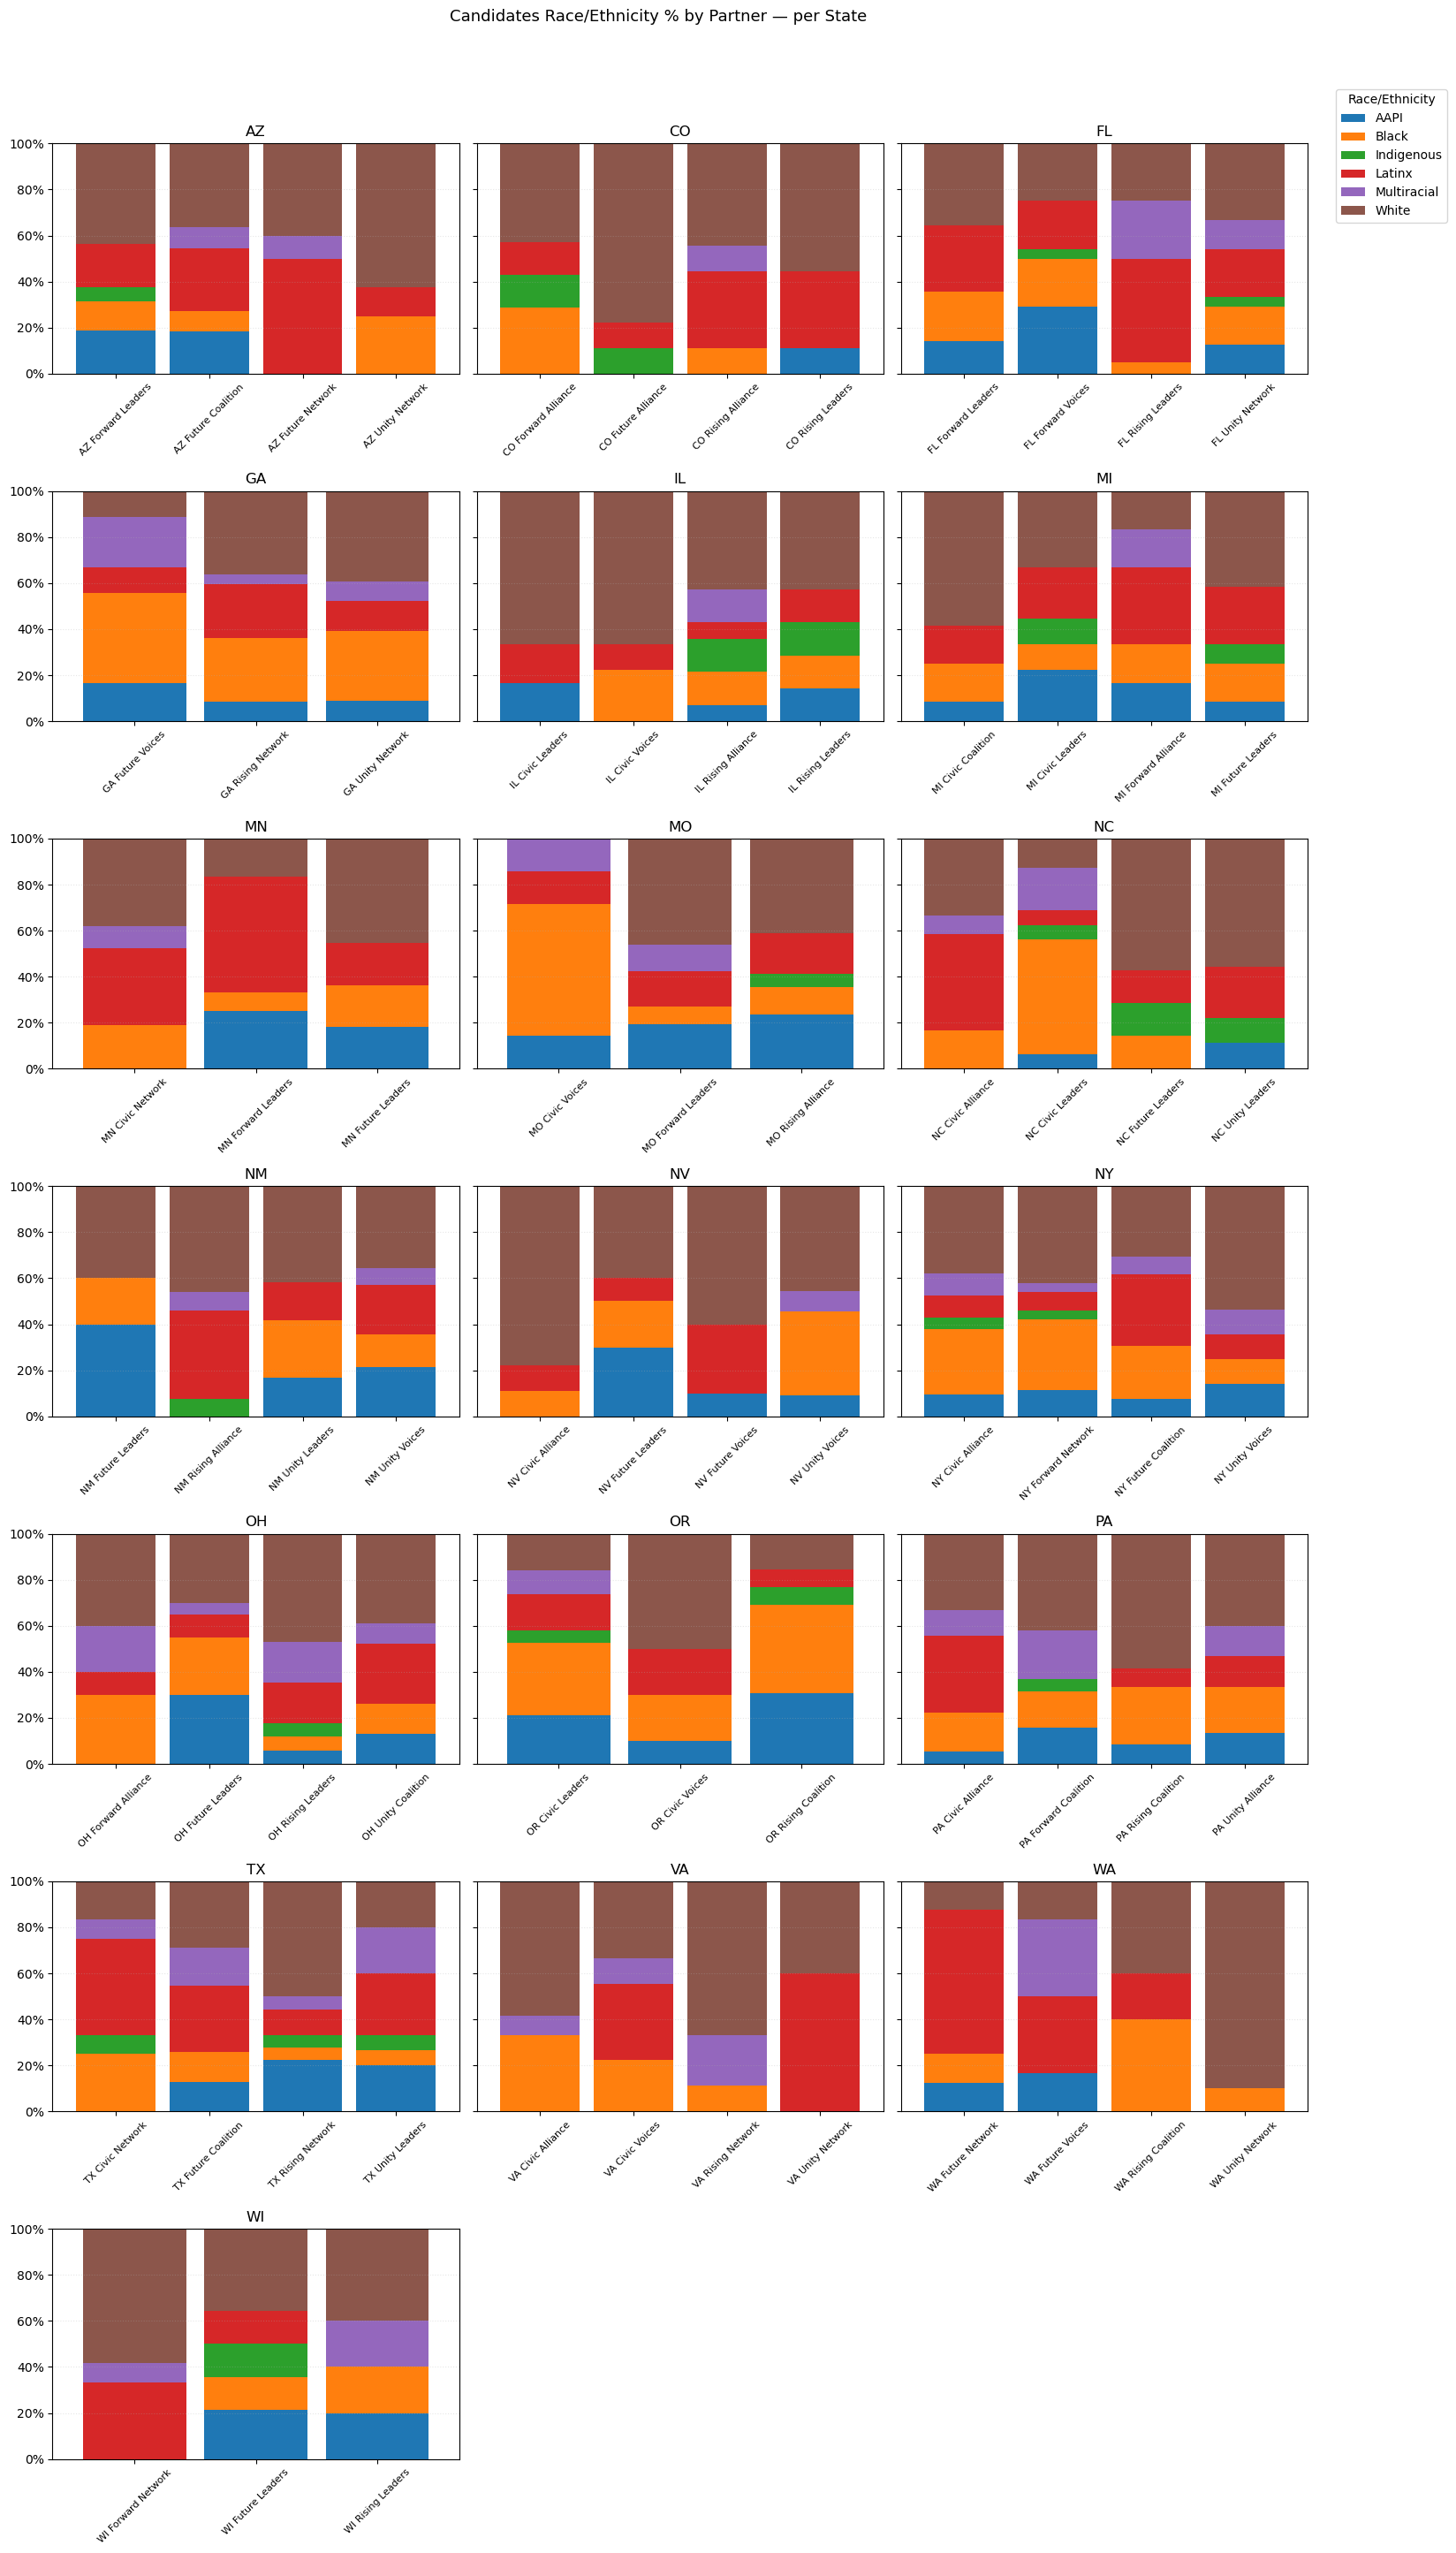

In [355]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

cols_to_plot = ['AAPI','Black','Indigenous','Latinx','Multiracial','White']

states = sorted(partner_race['state'].unique())
cols = 3
rows = math.ceil(len(states) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True, squeeze=False)

for i, st in enumerate(states):
    ax = axes.flat[i]

    sub = (partner_race[partner_race['state'] == st]
           .set_index('partner_name')[cols_to_plot])

    sub.plot(kind='bar', stacked=True, width=0.85, ax=ax)

    ax.set_title(st)
    ax.set_xlabel('')
    ax.set_ylim(0, 1)  # 0–1 since proportions
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.grid(axis='y', linestyle=':', alpha=0.3)

    # remove per-subplot legends; we'll add one shared legend
    leg = ax.get_legend()
    if leg:
        leg.remove()

# hide any unused subplot boxes
for j in range(len(states), rows * cols):
    axes.flat[j].axis('off')

# one shared legend
handles, labels = axes.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Race/Ethnicity',
           loc='upper right', bbox_to_anchor=(1.10, 1))

fig.suptitle('Candidates Race/Ethnicity % by Partner — per State', y=1.03, fontsize=13)
fig.tight_layout()
plt.show()


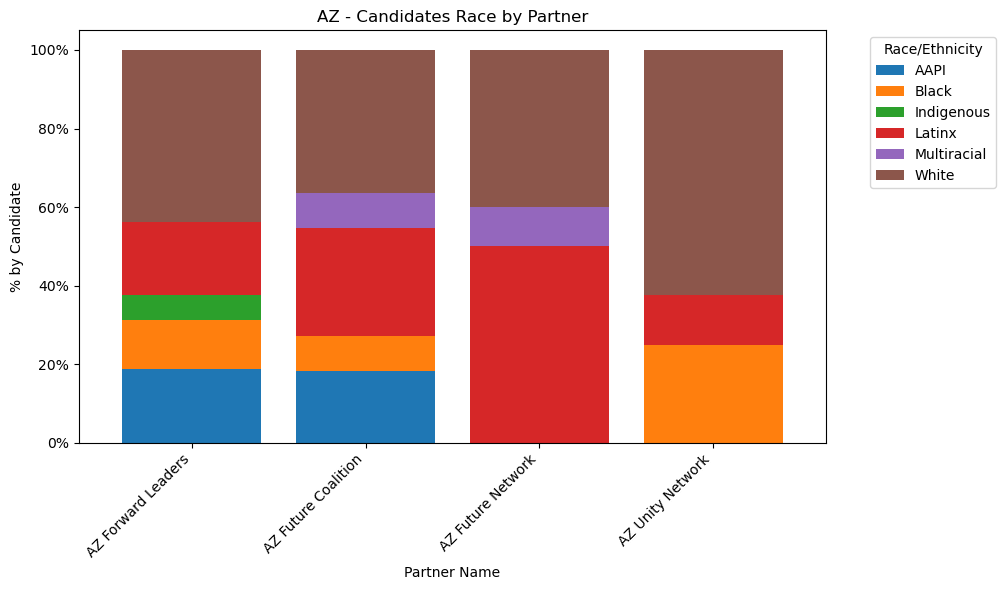

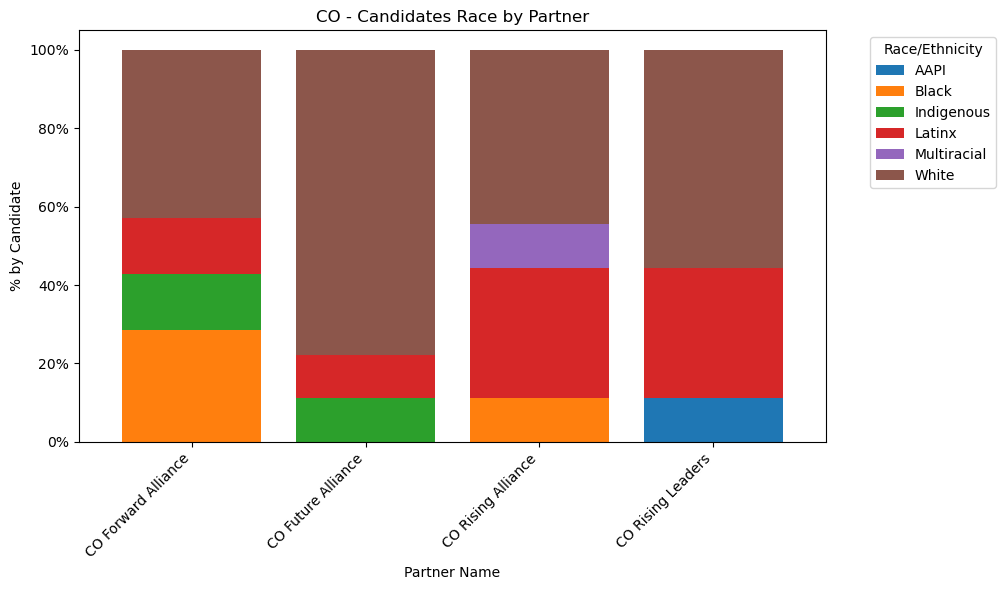

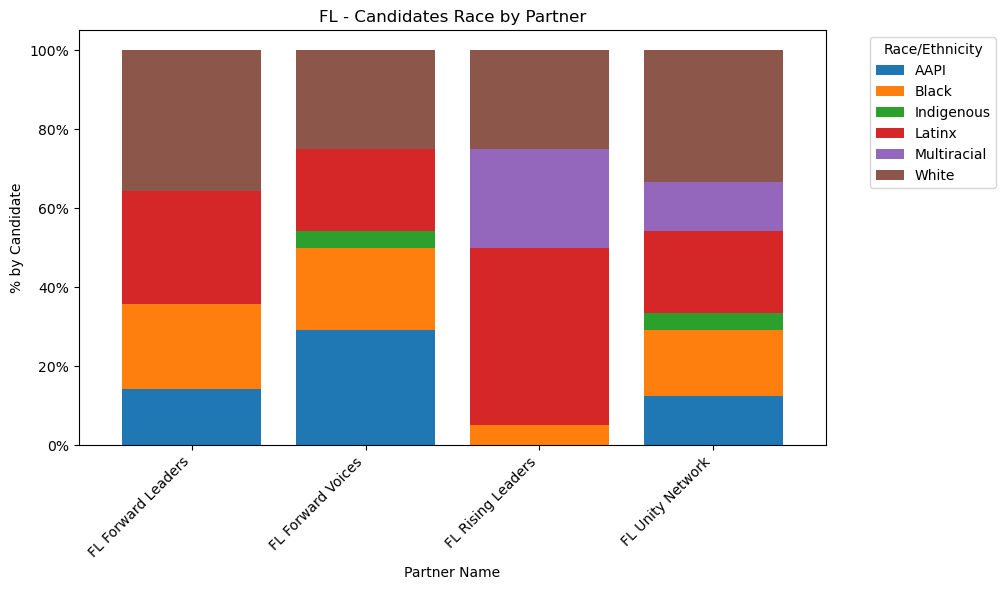

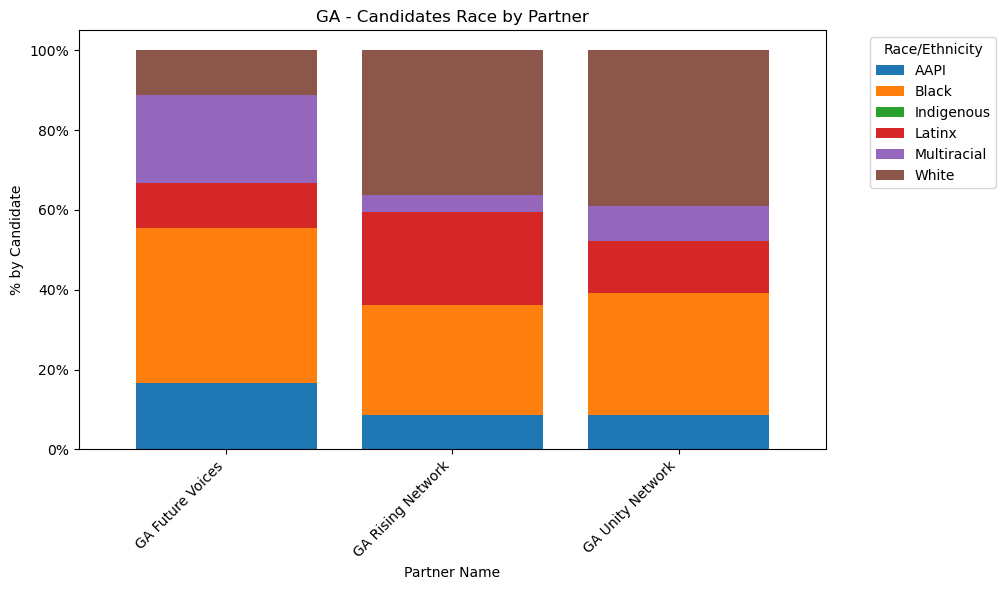

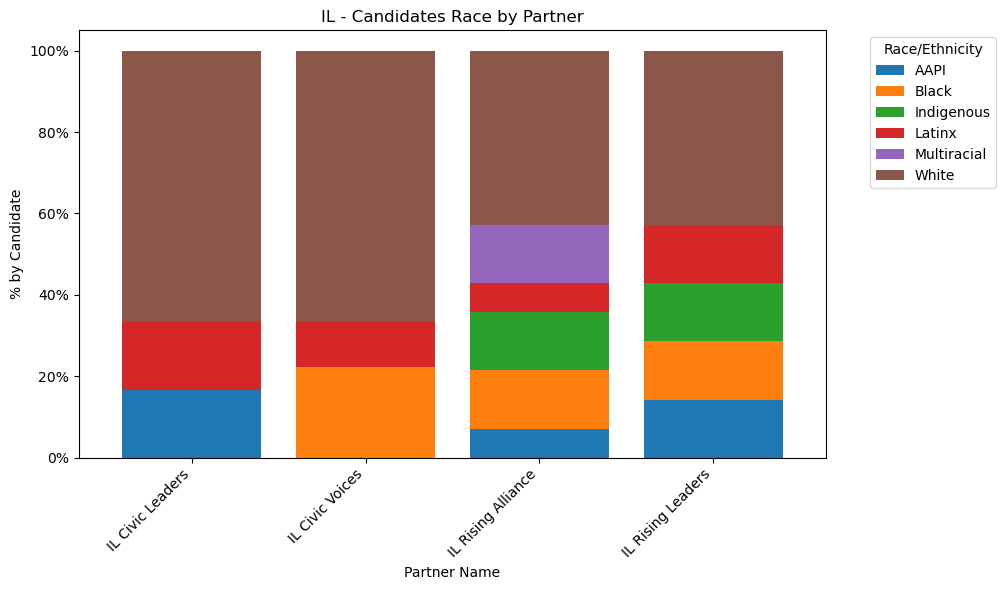

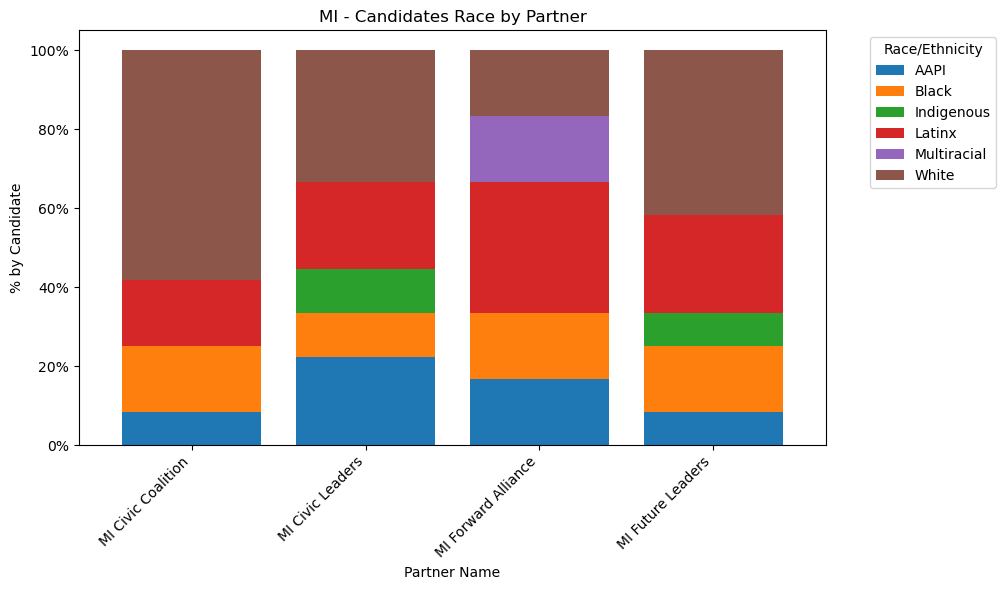

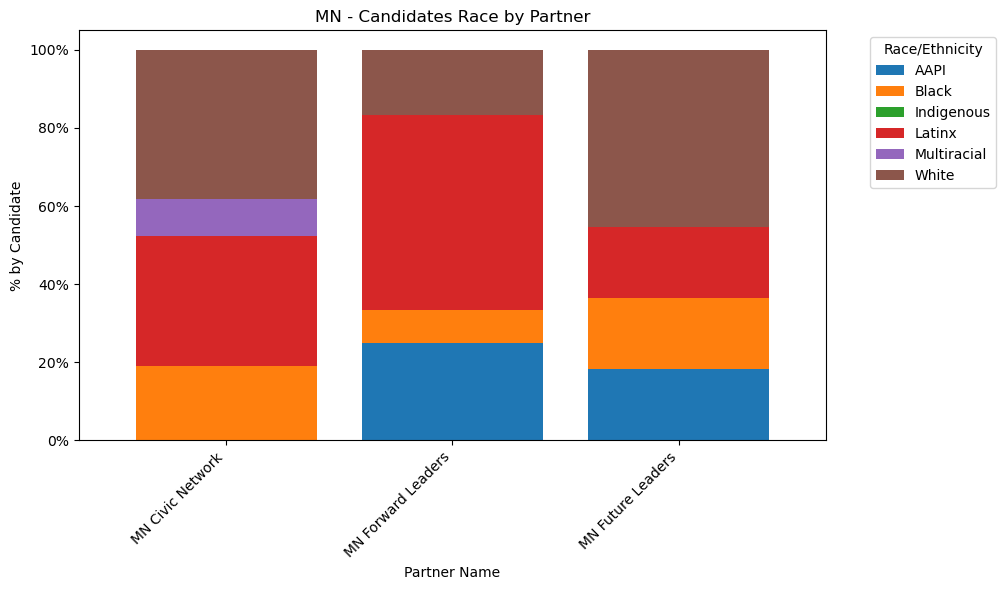

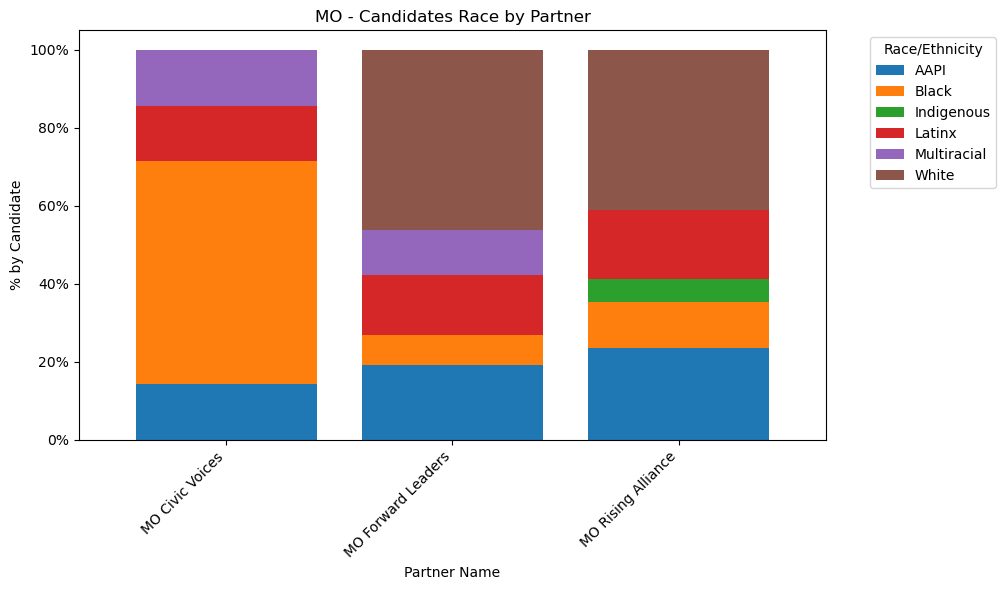

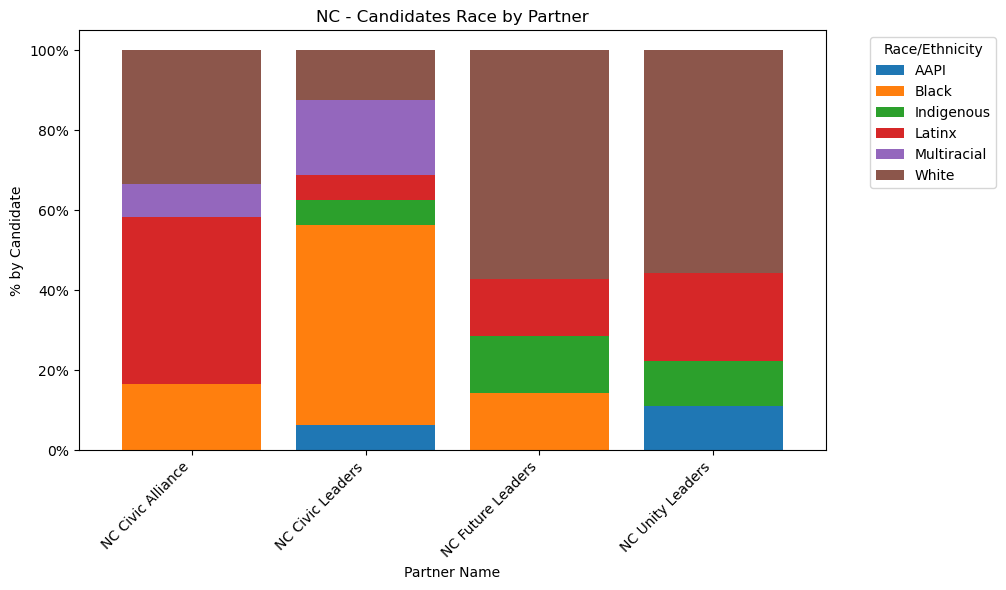

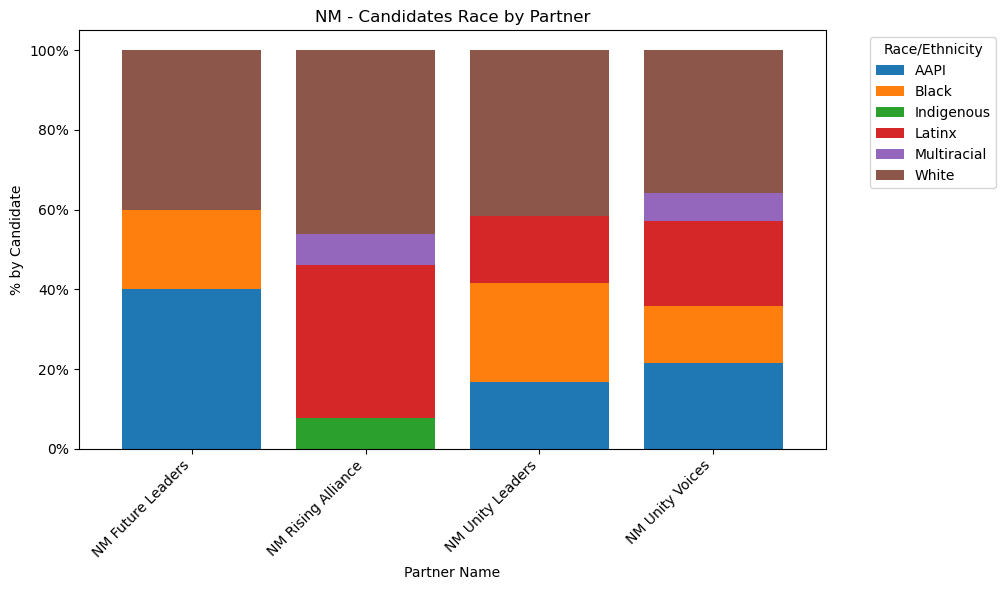

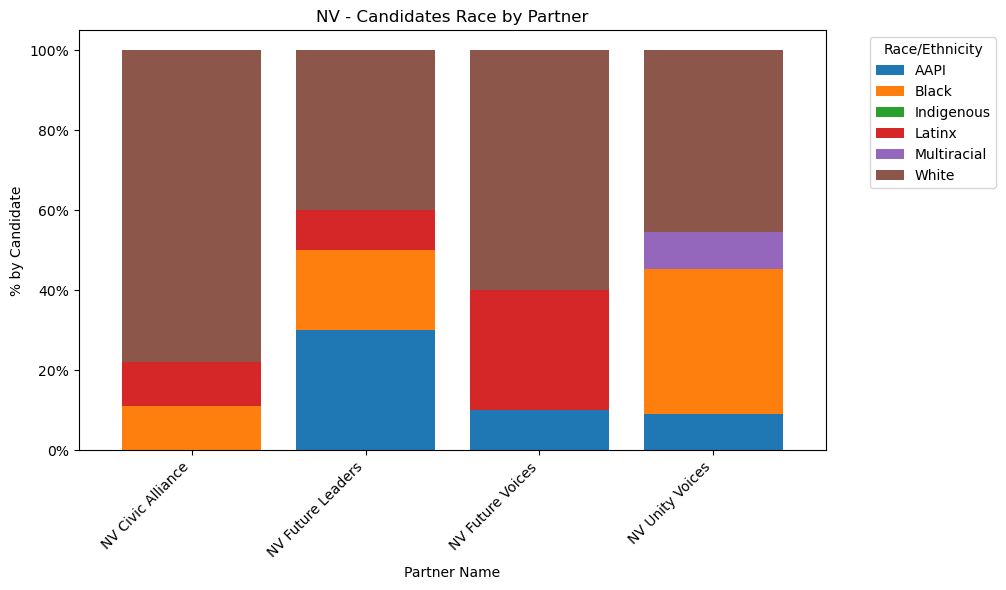

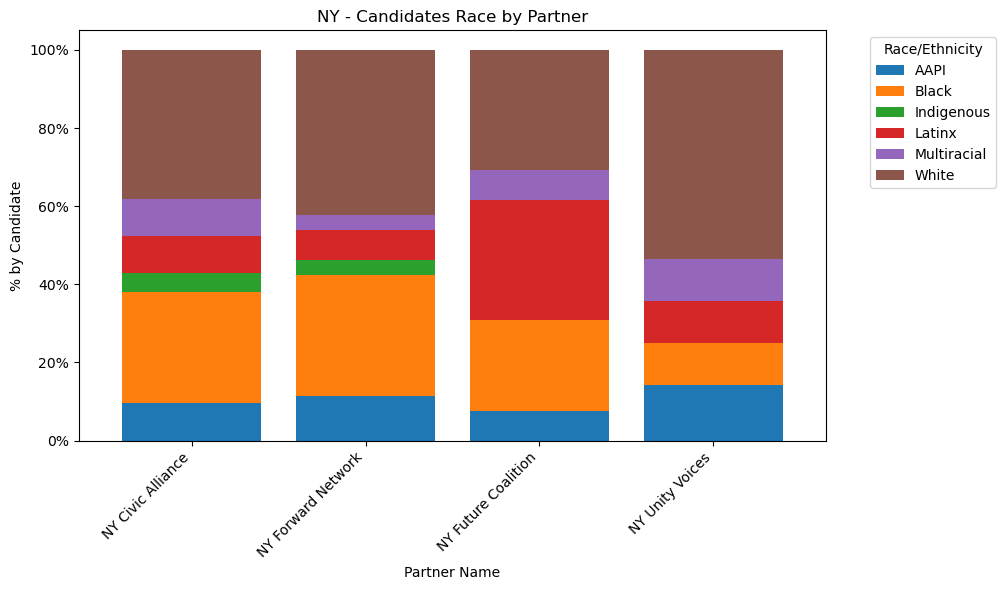

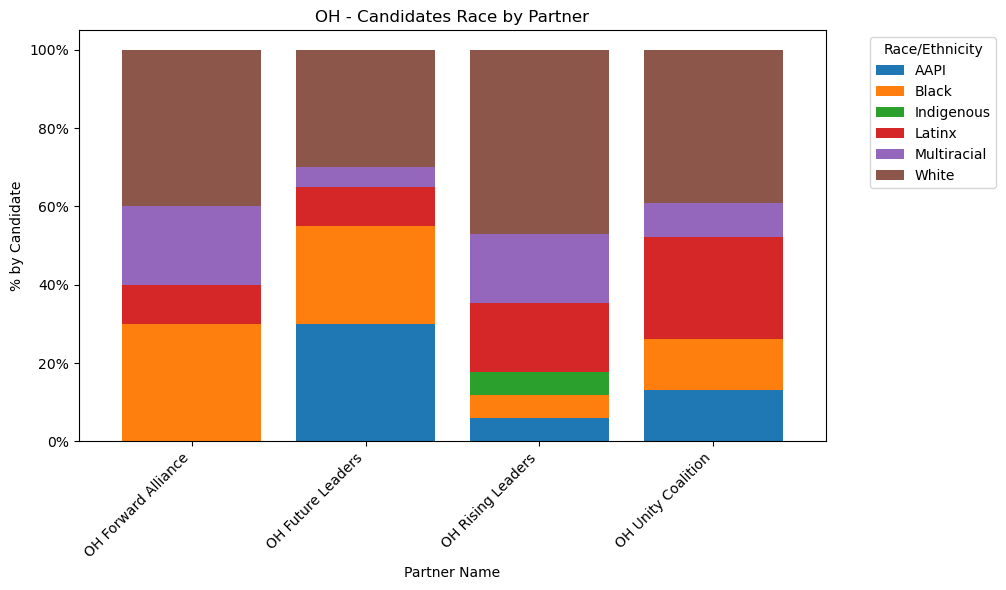

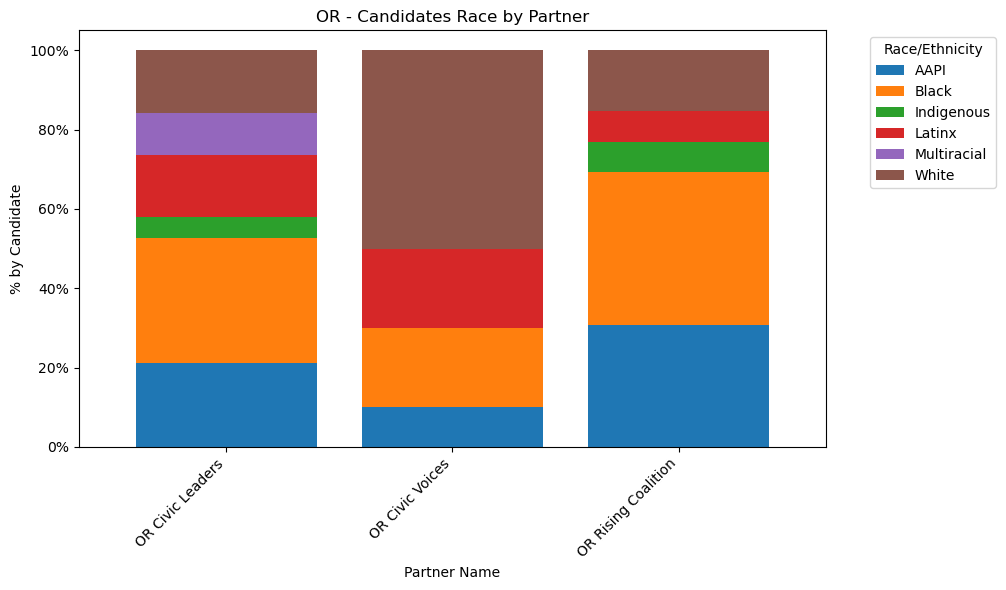

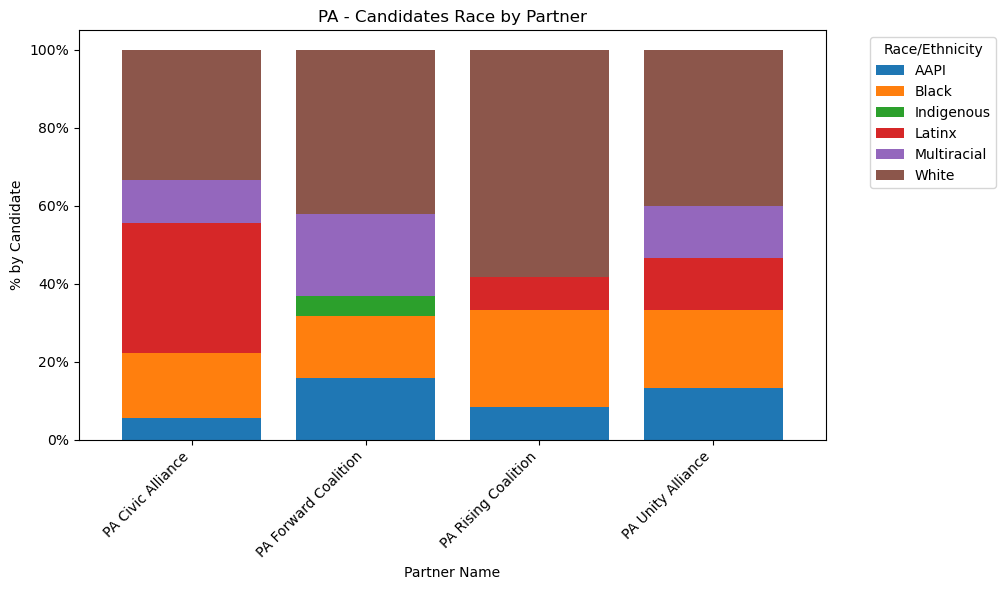

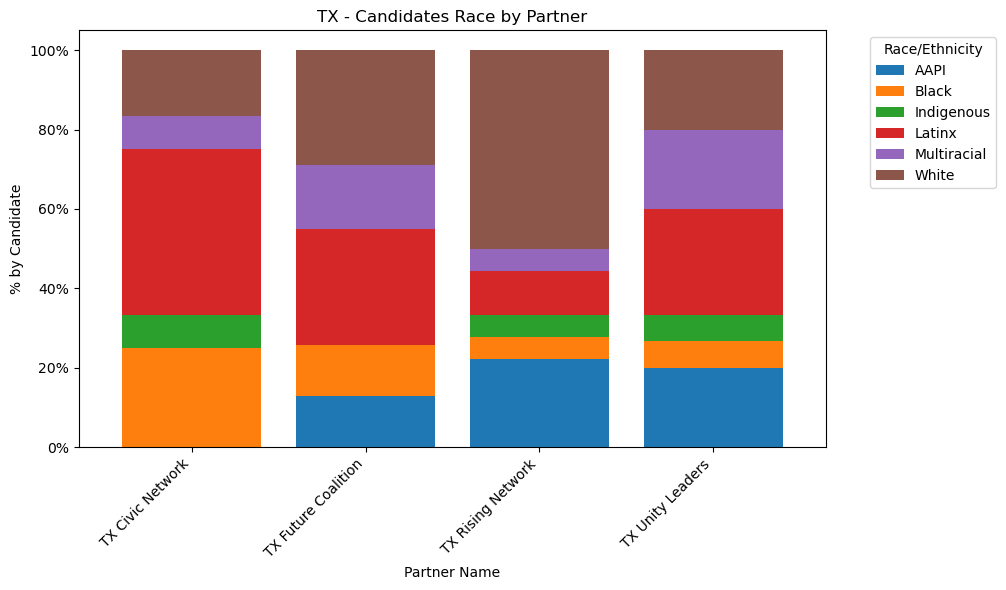

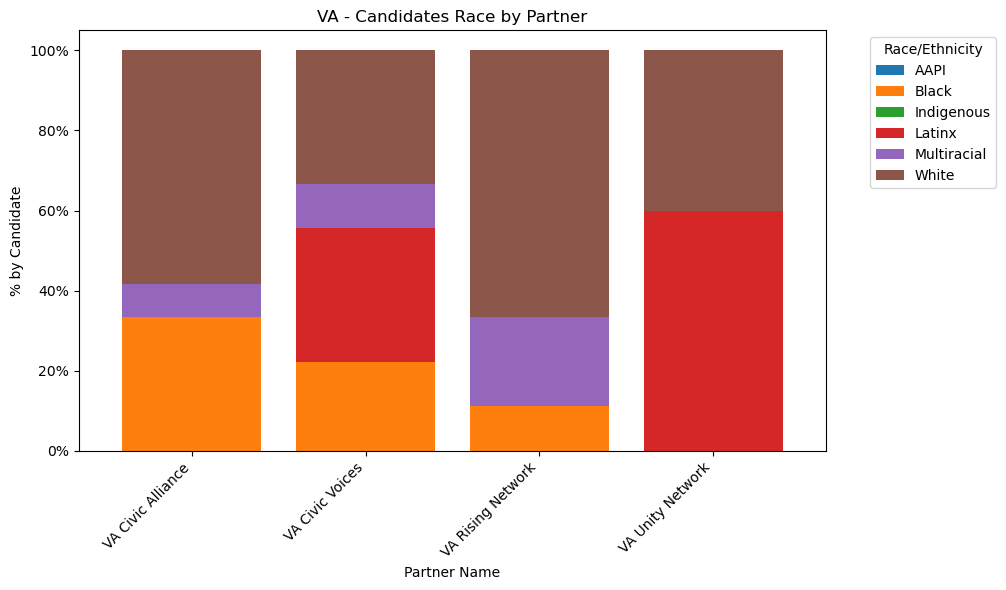

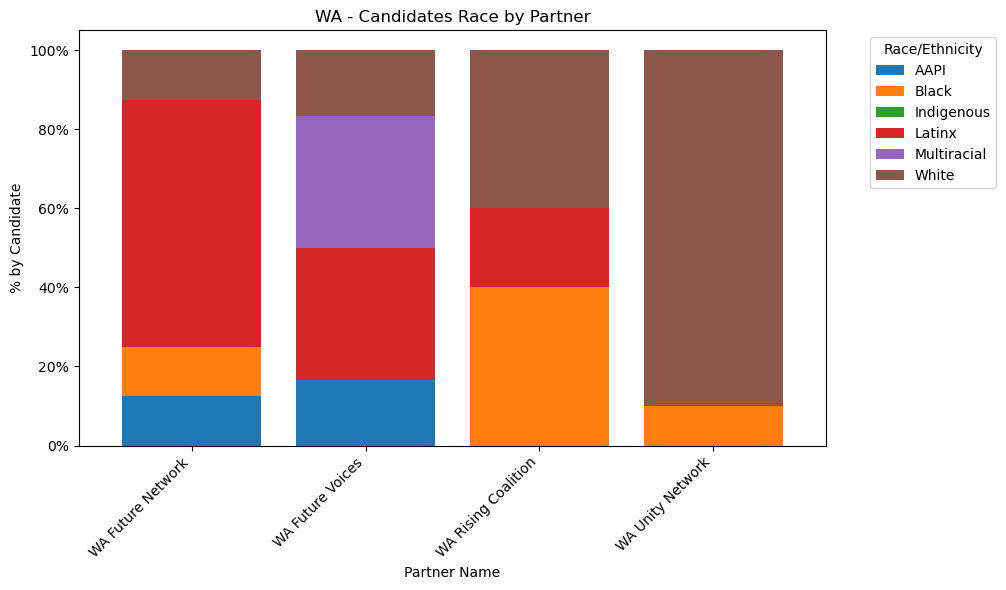

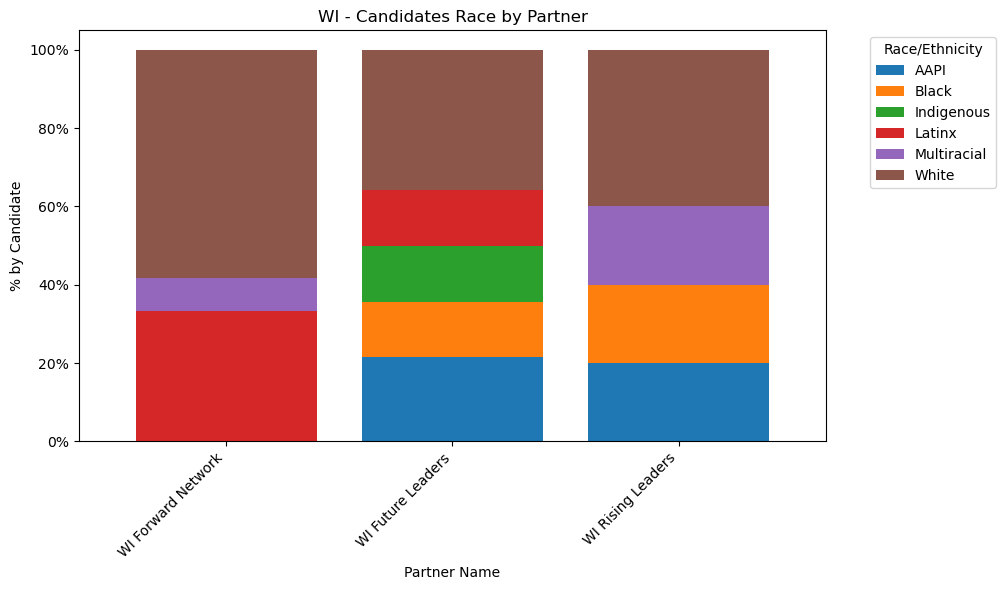

In [356]:
cols_to_plot = ['AAPI','Black','Indigenous','Latinx','Multiracial','White']


for state, df_state in partner_race.groupby('state'):
    df_state = df_state.set_index('partner_name') # setting partners as the index so they're on the x-axis
    
    df_state[cols_to_plot].plot(
        kind='bar',
        stacked=True,
        figsize=(10,6),
        width=0.8
    )
    
    plt.title(f"{state} - Candidates Race by Partner")
    plt.ylabel('% by Candidate')
    plt.xlabel('Partner Name')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Race/Ethnicity', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.show()


## Training Completion
### What percent of candidates have completed training?

In [357]:
training_by_state_by_office_level = (candidates.assign(training_completed = lambda x: (x['training_completed'] == True).astype(int) * 100)
    .groupby(['state', 'office_level'], as_index=False)['training_completed'].mean()
)

training_by_state_by_office_level.head(6)

,state,office_level,training_completed
0,AZ,Federal,50.000000
1,AZ,Local,78.125000
2,AZ,State,100.000000
3,CO,Federal,0.000000
4,CO,Local,68.181818
5,CO,State,72.727273


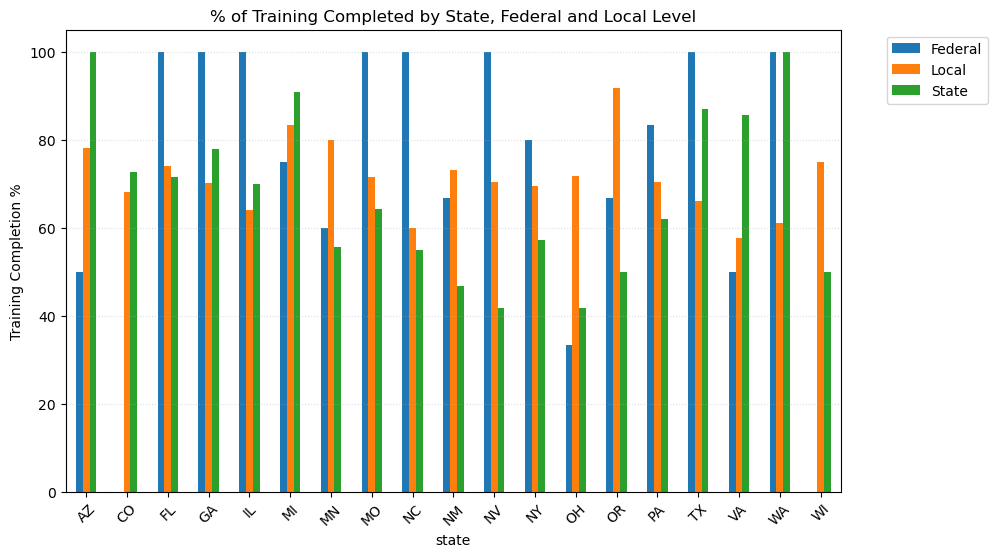

In [358]:
ax = (training_by_state_by_office_level.pivot(
    index='state', columns='office_level', values='training_completed'
)).plot(kind='bar', figsize=(10,6))

ax.set_title('% of Training Completed by State, Federal and Local Level')
ax.set_ylabel('Training Completion %')
ax.legend(bbox_to_anchor=(1.05,1))
ax.grid(axis='y', linestyle=':', alpha=0.4)
plt.xticks(rotation=45, ha='center')
plt.show()

## Do training completion rates differ by gender or race?

In [359]:
completed_training_by_gender = (candidates.assign(training_completed = lambda x: (x['training_completed'] == True).astype(int) * 100)
    .groupby(['state', 'gender'], as_index=False)['training_completed'].mean()
)

completed_training_by_gender.head()

,state,gender,training_completed
0,AZ,Man,73.684211
1,AZ,Nonbinary,66.666667
2,AZ,Woman,91.304348
3,CO,Man,75.000000
4,CO,Nonbinary,0.000000


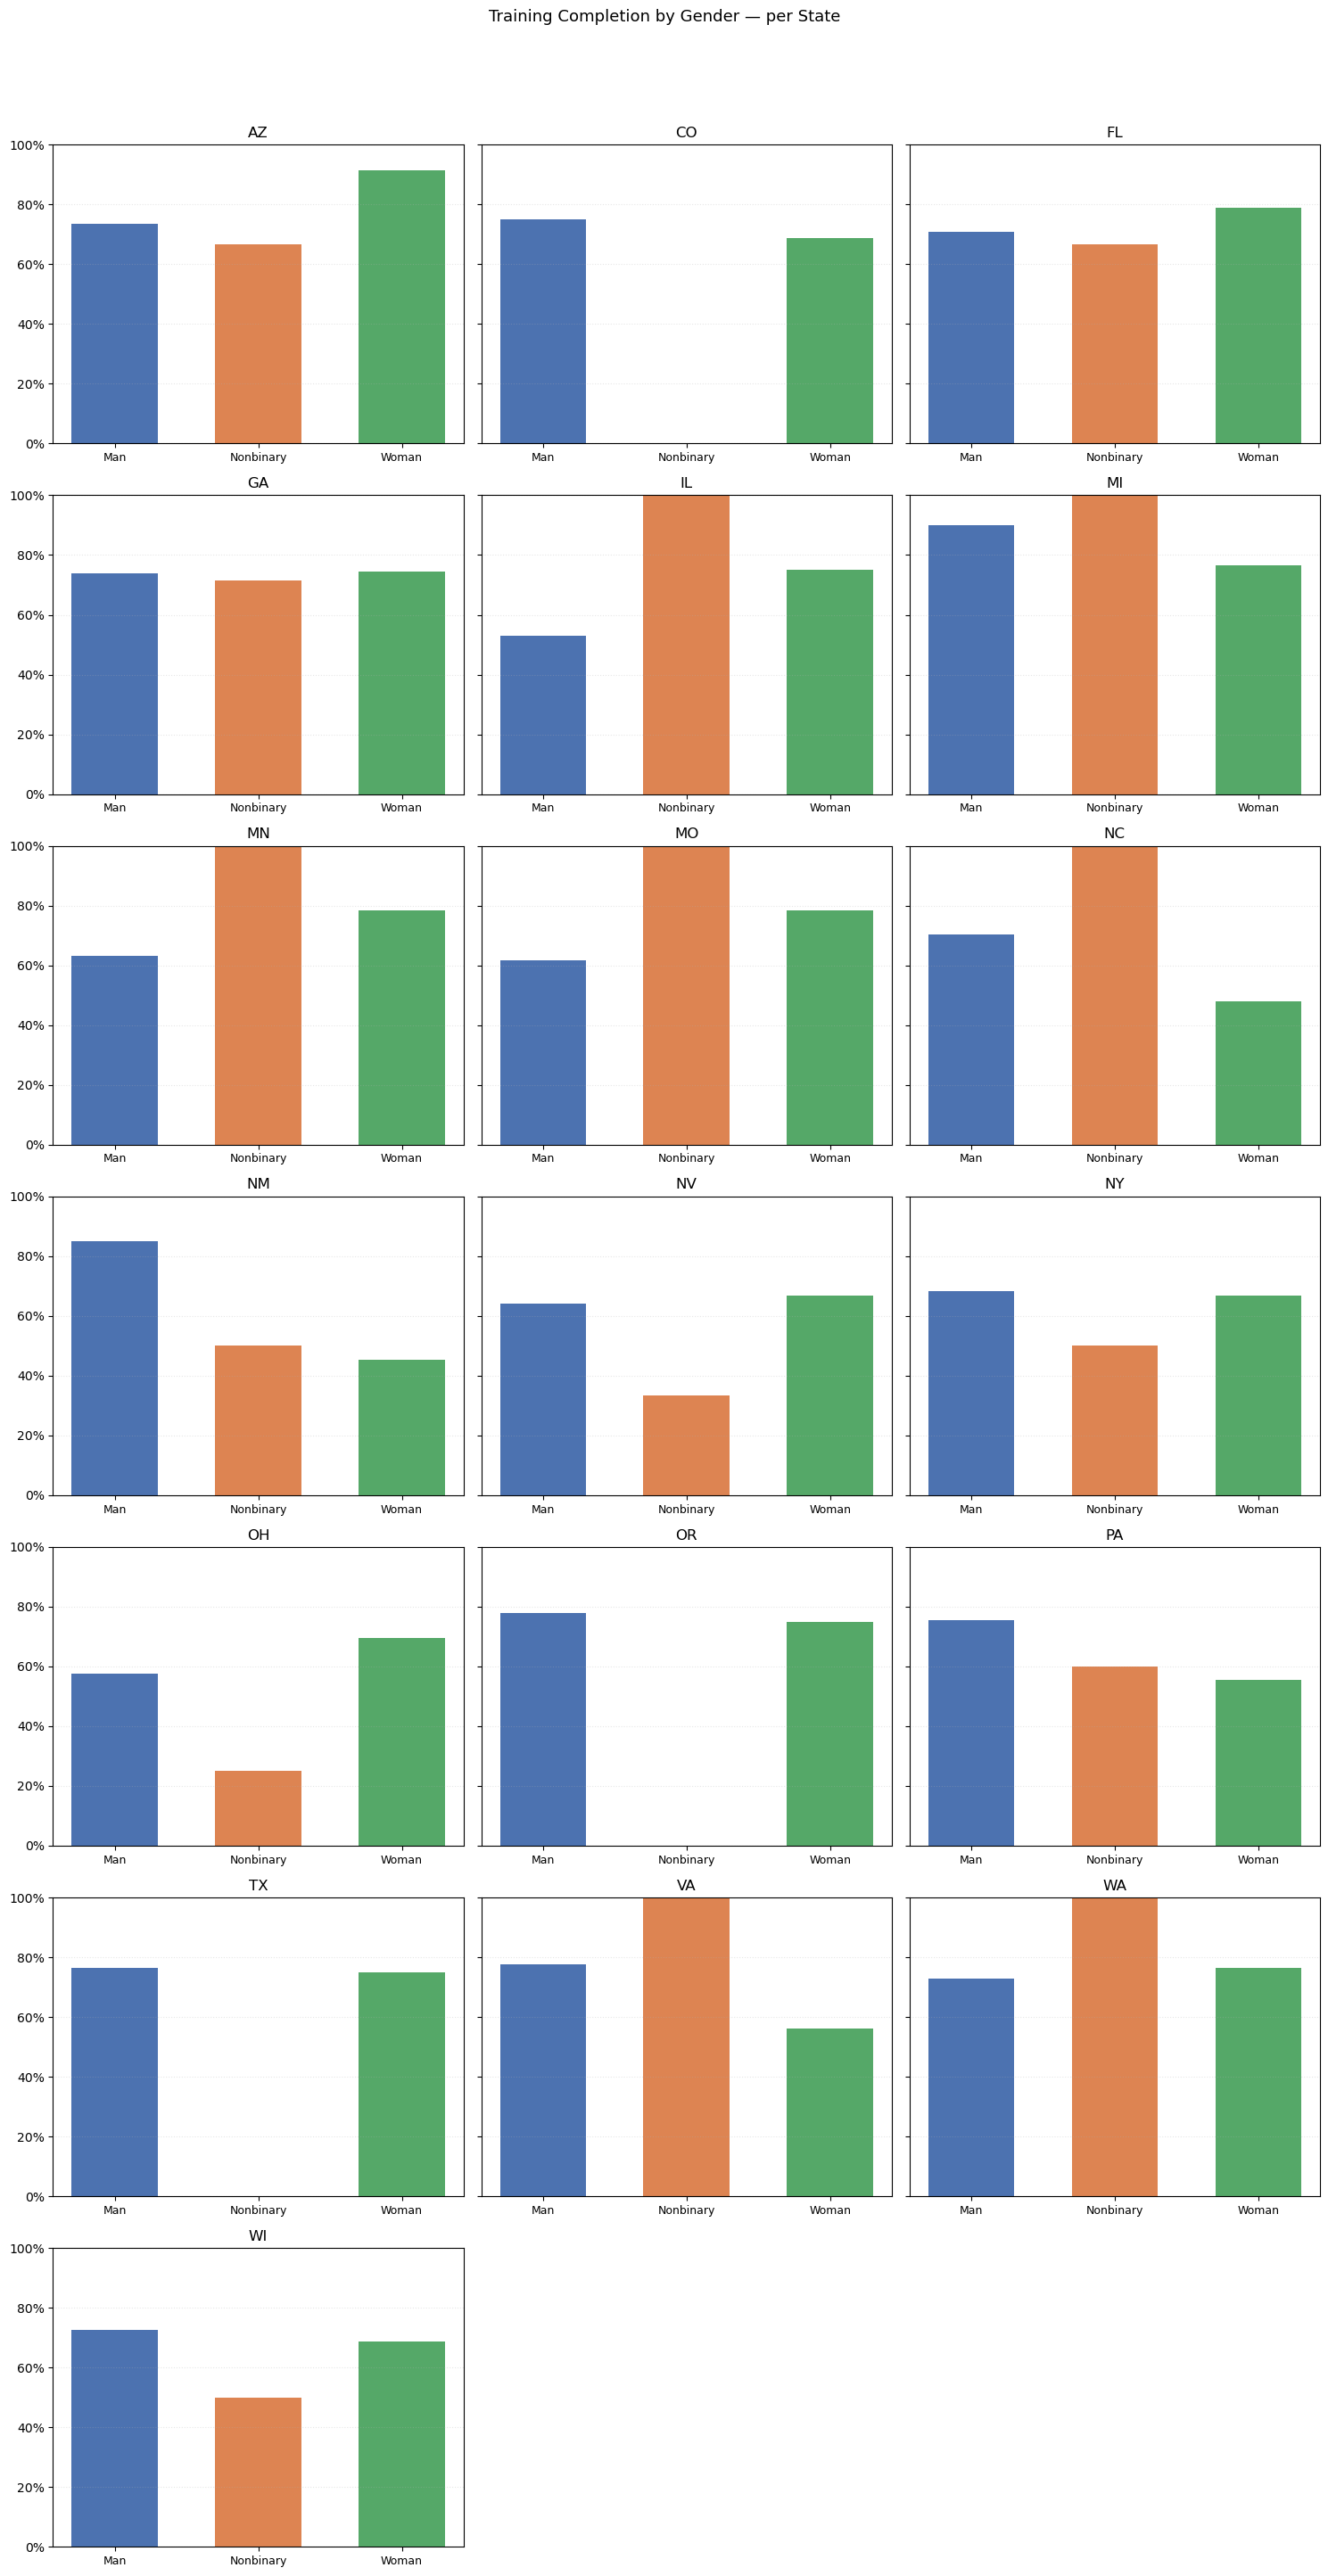

In [360]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

gender_order = ['Man', 'Nonbinary', 'Woman']
gender_colors = ['#4C72B0', '#DD8452', '#55A868']

states = sorted(completed_training_by_gender['state'].unique())
cols = 3
rows = math.ceil(len(states) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True, squeeze=False)

for i, st in enumerate(states):
    ax = axes.flat[i]

    # filter to this state and enforce gender order
    sub = (completed_training_by_gender
           .query('state == @st')
           .set_index('gender')
           .reindex(gender_order))

    # plot: x = gender names, y = percent values (0–100)
    ax.bar(sub.index, sub['training_completed'], width=0.6, color=gender_colors)

    ax.set_title(st)
    ax.set_xlabel('')
    ax.set_ylim(0, 100)  # values are 0–100
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
    ax.grid(axis='y', linestyle=':', alpha=0.3)
    ax.tick_params(axis='x', rotation=0, labelsize=9)

# hide any unused cells
for j in range(len(states), rows * cols):
    axes.flat[j].axis('off')

fig.suptitle('Training Completion by Gender — per State', y=1.03, fontsize=13)
fig.tight_layout()
plt.show()


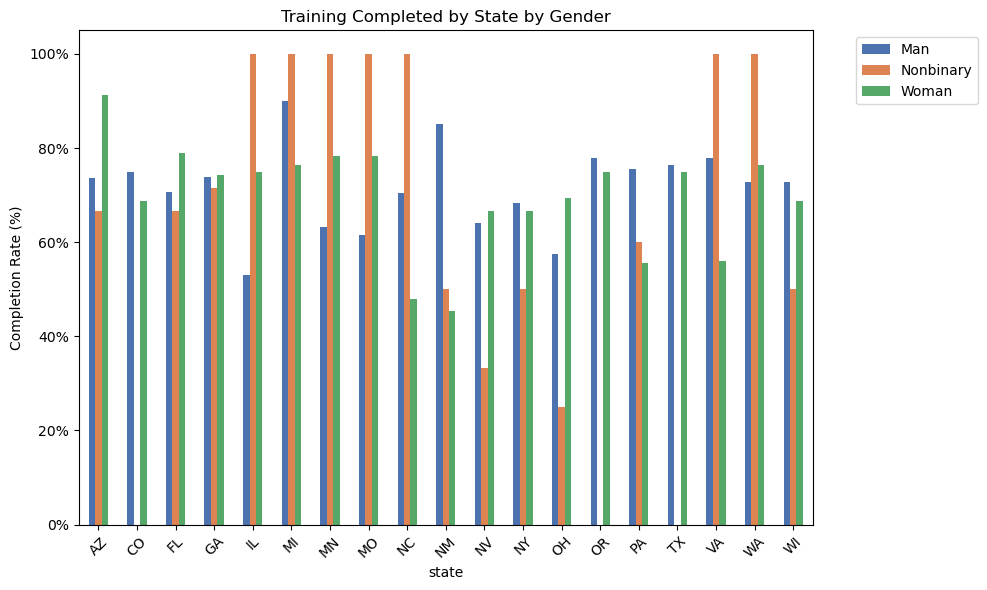

In [361]:
ax = (completed_training_by_gender.pivot(
    index='state', columns='gender', values='training_completed'
)).plot(kind='bar', figsize=(10,6), color=gender_colors)

ax.set_title('Training Completed by State by Gender')
ax.set_ylabel('Completion Rate (%)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [362]:
training_completed_by_race_by_state = (candidates.assign(training_completed = lambda x: (x['training_completed'] == True).astype(int) * 100)
    .groupby(['state', 'race_ethnicity'], as_index=False)['training_completed'].mean()
)

training_completed_by_race_by_state.head()

,state,race_ethnicity,training_completed
0,AZ,AAPI,100.0
1,AZ,Black,60.0
2,AZ,Indigenous,0.0
3,AZ,Latinx,75.0
4,AZ,Multiracial,100.0


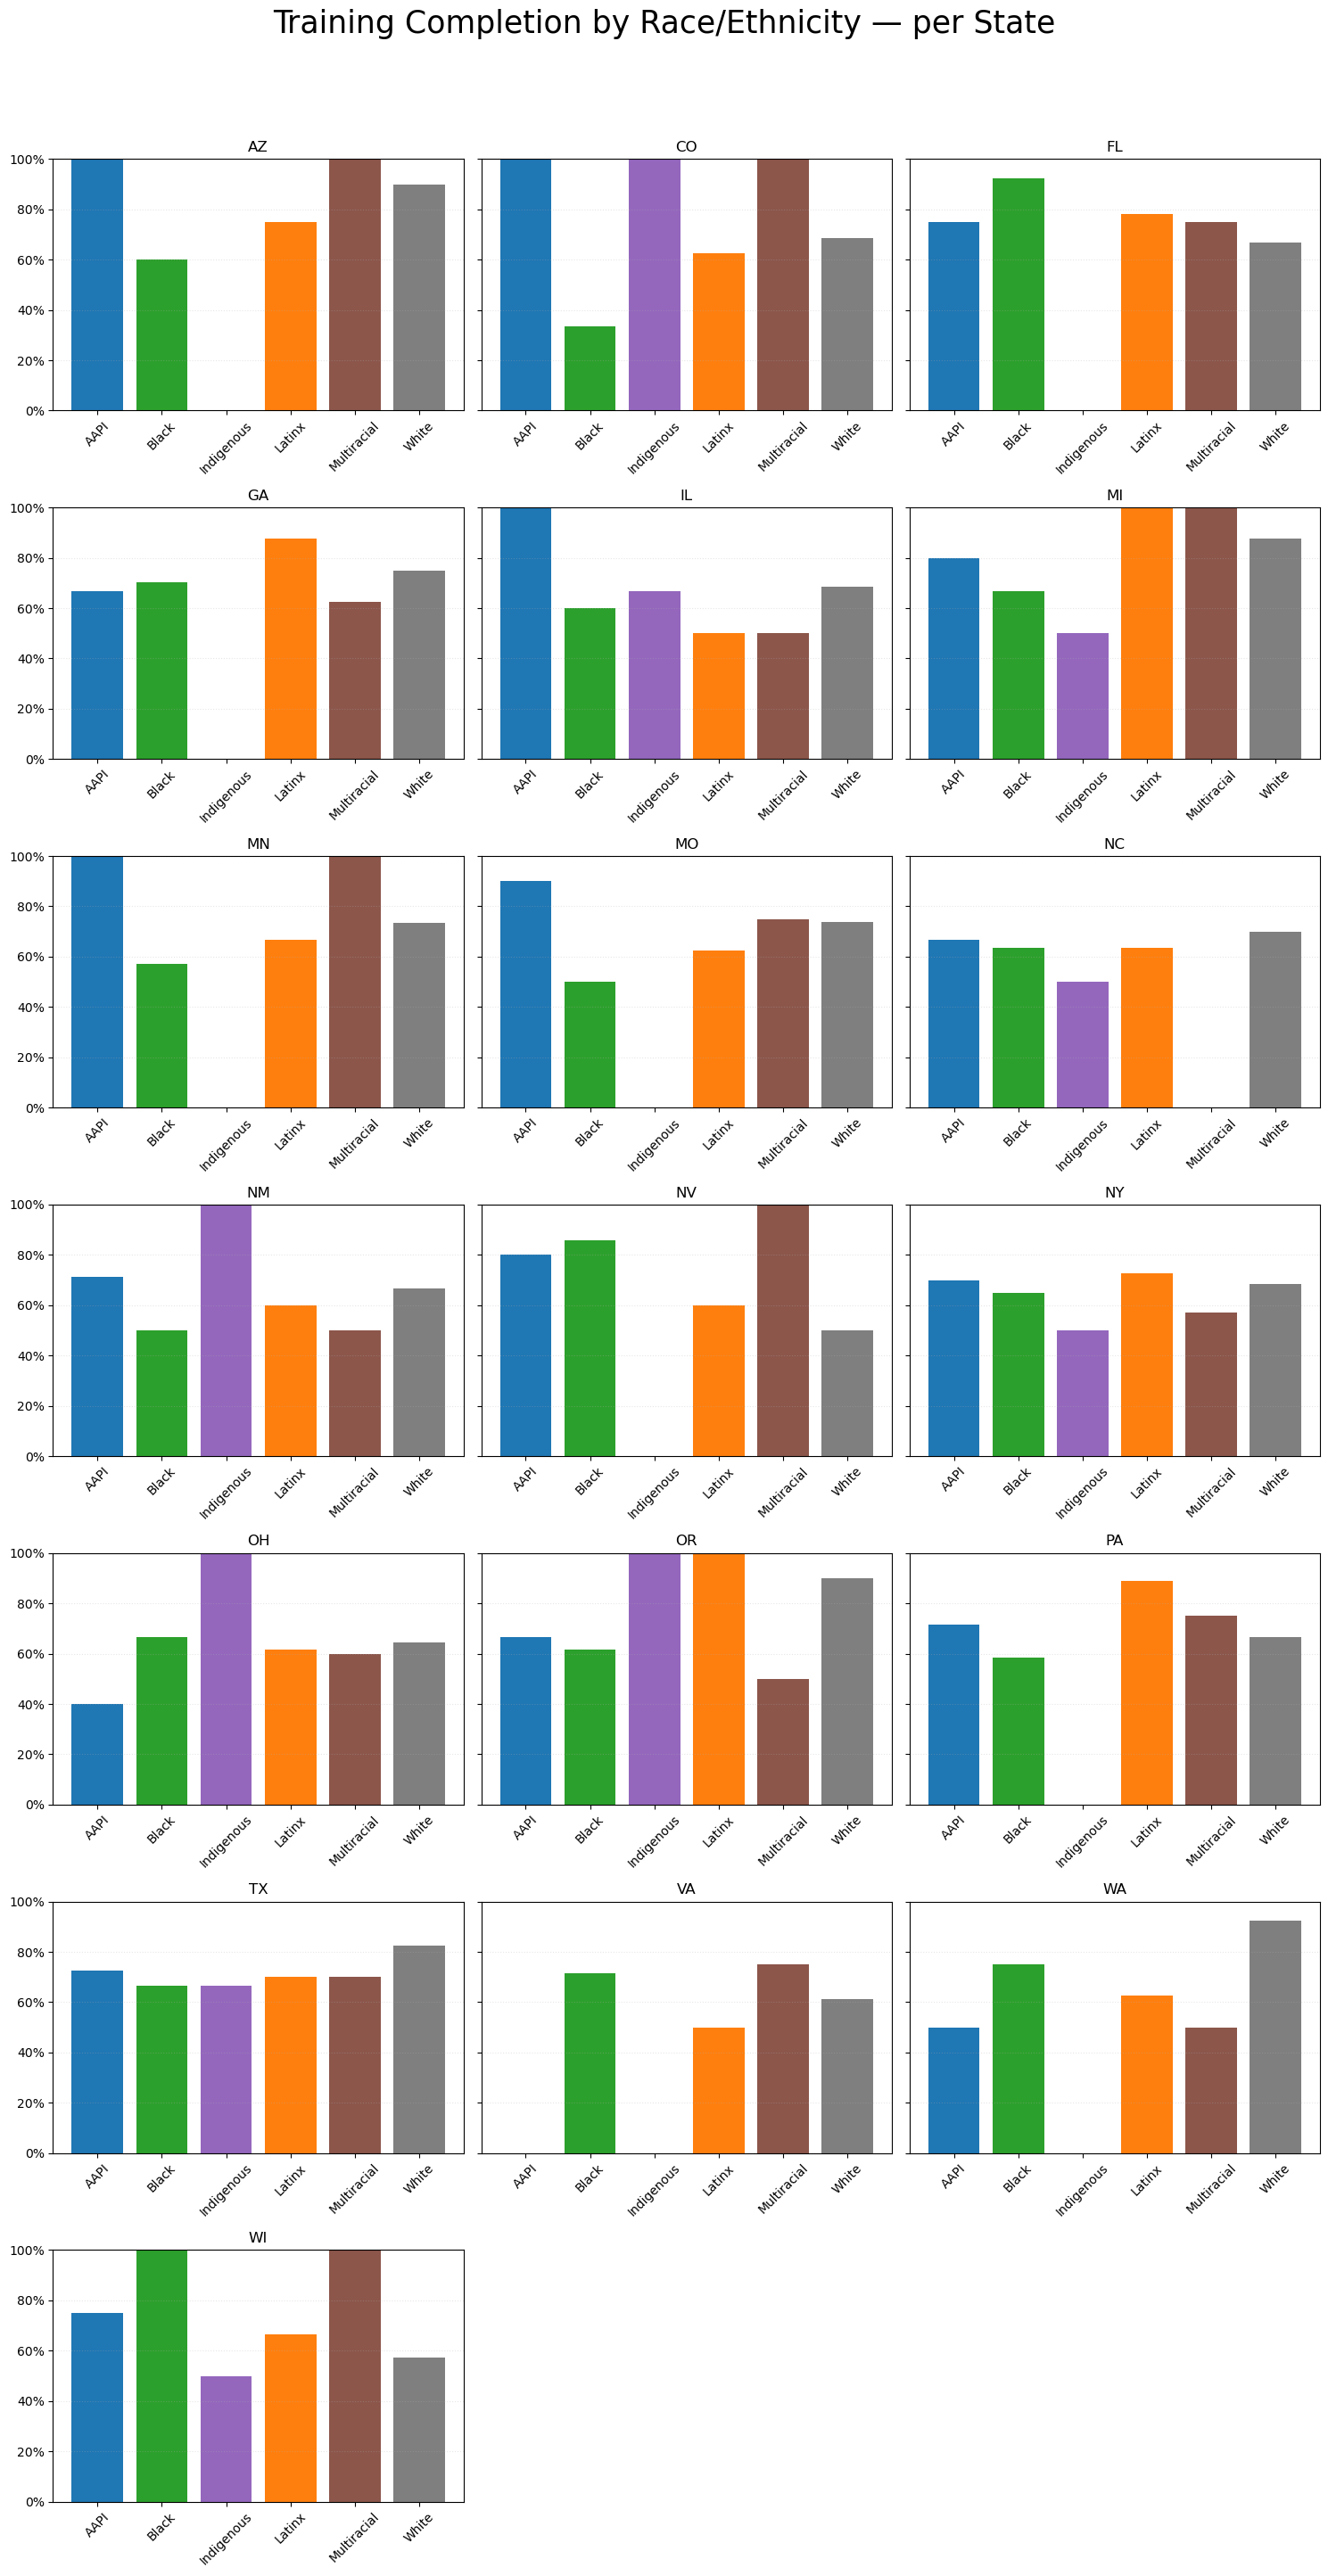

In [363]:
race_order = ['AAPI','Black','Indigenous','Latinx','Multiracial','White']
race_colors = ['#1f77b4','#2ca02c','#9467bd','#ff7f0e','#8c564b','#7f7f7f']

states = sorted(training_completed_by_race_by_state['state'].unique())
cols = 3
rows = math.ceil(len(states) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4), sharey=True, squeeze=False)

for i, st in enumerate(states):
    ax = axes.flat[i]

    sub = training_completed_by_race_by_state[
        training_completed_by_race_by_state['state'] == st
    ]


    sub = sub.set_index('race_ethnicity').reindex(race_order, fill_value=0)

    ax.bar(sub.index, sub['training_completed'], color=race_colors)

    ax.set_title(st)
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle=':', alpha=0.3)

# Turn off any unused subplots
for j in range(len(states), rows * cols):
    axes.flat[j].axis('off')

fig.suptitle('Training Completion by Race/Ethnicity — per State', y=1.03, fontsize=25)
fig.tight_layout()
plt.show()

## 💻 Program Effectiveness

**Goal:** Evaluate how well programs engage, support, and prepare candidates — and whether success differs across program types or demographics.

**Focus & Example Questions**
- **Program Engagement**
  - How many candidates participated in at least one program?
  - What is the average number of programs per candidate?
  - Which programs have the highest participation?
- **Completion and Satisfaction**
  - What are the average completion and feedback rates per program type (Bootcamp, Fellowship, etc.)?
  - Which programs have the highest average feedback rating?
  - Is there a relationship between completion rate and feedback rating?
- **Equity Lens**
  - Are certain demographic groups (e.g., women, BIPOC) underrepresented in completed programs compared to enrollment?
  - Do average scores differ by demographic?


# How many candidates participated in at least one program?

In [364]:
programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active
0,PRG0001,PAR001,Campaign Bootcamp,Bootcamp,2022-03-23,2022-07-22,28,False
1,PRG0002,PAR001,Organizing Workshop,Workshop,2023-12-26,2024-08-11,34,False
2,PRG0003,PAR001,Campaign Bootcamp,Workshop,2023-04-30,2023-07-10,18,False
3,PRG0004,PAR001,Civic Fellows,Workshop,2023-01-03,2023-08-09,46,False
4,PRG0005,PAR002,Leaders of Tomorrow,Workshop,2022-11-23,2023-07-12,19,False


In [365]:
participation.head()

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0


In [366]:
candidates.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040


In [367]:
# merging progams and participation 
program_analysis = candidates.merge(participation, how='left', on='candidate_id')

program_analysis.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,participant_id,program_id,completion_status,score,feedback_rating
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,PTC00001,PRG0255,Completed,96.0,4.8
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NaN,NaN,NaN,NaN,NaN
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,PTC00002,PRG0136,Completed,100.0,4.4
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00003,PRG0166,Completed,83.1,4.8
4,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00004,PRG0072,Completed,80.0,5.0


In [368]:
# program_analysis dataframe with programs dataframe
program_analysis = program_analysis.merge(programs[['program_id', 'program_name', 'type']], how='left', on='program_id')

In [369]:
program_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2624 entries, 0 to 2623
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   candidate_id        2624 non-null   object 
 1   name                2624 non-null   object 
 2   state               2624 non-null   object 
 3   race_ethnicity      2624 non-null   object 
 4   gender              2624 non-null   object 
 5   age                 2624 non-null   int64  
 6   office_level        2624 non-null   object 
 7   training_completed  2624 non-null   bool   
 8   election_outcome    2624 non-null   object 
 9   partner_id          2624 non-null   object 
 10  participant_id      2560 non-null   object 
 11  program_id          2560 non-null   object 
 12  completion_status   2560 non-null   object 
 13  score               1649 non-null   float64
 14  feedback_rating     2560 non-null   float64
 15  program_name        2560 non-null   object 
 16  type  

In [370]:
participated_candidates = program_analysis.dropna(subset='program_id')

participated_candidates['candidate_id'].nunique()

936

## What is the average number of programs per candidate?

In [371]:
# total number of participation records
total_enrollments = participation.shape[0]
# total number of unique candidates 
num_unique_candidates = candidates['candidate_id'].nunique()
# calculating the avg
avg_programs_per_candidate = total_enrollments / num_unique_candidates

print(f"Total program enrollments (rows in participation DF) {total_enrollments}")
print(f"Avg number of programs per candidate: {avg_programs_per_candidate:.2f}")

Total program enrollments (rows in participation DF) 2560
Avg number of programs per candidate: 2.56


## Which programs have the highest participation?

In [372]:
program_analysis[program_analysis['program_name'] == 'Policy Lab']

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,participant_id,program_id,completion_status,score,feedback_rating,program_name,type
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,PTC00001,PRG0255,Completed,96.0,4.8,Policy Lab,Workshop
8,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040,PTC00008,PRG0237,Completed,76.7,3.5,Policy Lab,Fellowship
13,CND0006,Quinn Thompson,FL,Latinx,Man,34,State,False,Lost,PAR057,PTC00013,PRG0200,Completed,90.7,4.3,Policy Lab,Mentorship
16,CND0007,Parker Garcia,OH,AAPI,Man,47,Local,False,TBD,PAR053,PTC00016,PRG0237,Completed,90.0,4.3,Policy Lab,Fellowship
21,CND0008,Drew Thomas,MI,Latinx,Woman,41,Local,True,TBD,PAR008,PTC00021,PRG0030,Completed,81.5,4.1,Policy Lab,Workshop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593,CND0989,Devon Thompson,FL,Indigenous,Man,34,State,False,Won,PAR059,PTC02530,PRG0076,Completed,79.1,4.5,Policy Lab,Mentorship
2596,CND0989,Devon Thompson,FL,Indigenous,Man,34,State,False,Won,PAR059,PTC02533,PRG0252,In Progress,NaN,5.0,Policy Lab,Bootcamp
2602,CND0992,Quinn White,MO,White,Nonbinary,21,State,True,Won,PAR076,PTC02539,PRG0258,Completed,91.1,4.9,Policy Lab,Workshop
2617,CND0998,Elliot Williams,FL,Latinx,Woman,40,State,True,Won,PAR058,PTC02554,PRG0209,Completed,91.5,4.6,Policy Lab,Workshop


In [373]:
program_participation = program_analysis.groupby('program_name', as_index=False)['program_id'].count().sort_values('program_id' ,ascending=False).reset_index(drop=True)

print("Program Participation")
program_participation

Program Participation


,program_name,program_id
0,Organizing Workshop,569
1,Civic Fellows,551
2,Policy Lab,539
3,Leaders of Tomorrow,495
4,Campaign Bootcamp,406


In [374]:
#turning series into a dataframe
program_participation = program_participation.reset_index()

In [375]:
program_participation

,index,program_name,program_id
0,0,Organizing Workshop,569
1,1,Civic Fellows,551
2,2,Policy Lab,539
3,3,Leaders of Tomorrow,495
4,4,Campaign Bootcamp,406


In [376]:
program_participation.rename(columns={'program_id': 'number of participants'}, inplace=True)

In [377]:
program_analysis.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,participant_id,program_id,completion_status,score,feedback_rating,program_name,type
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,PTC00001,PRG0255,Completed,96.0,4.8,Policy Lab,Workshop
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,PTC00002,PRG0136,Completed,100.0,4.4,Civic Fellows,Bootcamp
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00003,PRG0166,Completed,83.1,4.8,Leaders of Tomorrow,Fellowship
4,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00004,PRG0072,Completed,80.0,5.0,Civic Fellows,Bootcamp


In [378]:
total_participation_enrollments = program_analysis['program_name'].count()

program_participation['program % to total enrollment'] = ((program_participation['number of participants'] 
                                                          / total_participation_enrollments) * 100).round(3)

program_participation

,index,program_name,number of participants,program % to total enrollment
0,0,Organizing Workshop,569,22.227
1,1,Civic Fellows,551,21.523
2,2,Policy Lab,539,21.055
3,3,Leaders of Tomorrow,495,19.336
4,4,Campaign Bootcamp,406,15.859


## What are the average completion and feedback rates per program type (Bootcamp, Fellowship, etc.)?

In [379]:
program_analysis['is_completed'] = (program_analysis['training_completed'] == True).astype(int)

In [380]:
program_summary = program_analysis.groupby('type')[['is_completed', 'feedback_rating']].mean().round(3)

program_summary = program_summary.rename(columns=({'is_completed': 'Avg Completion Rate', 'feedback_rating': 'Avg Feedback Rating'} ))

program_summary['Avg Completion Rate'] = (program_summary['Avg Completion Rate'] * 100)

program_summary.rename(columns={'Avg Completion Rate': 'Avg Completion Rate (%)'}, inplace=True)

program_summary

,Avg Completion Rate (%),Avg Feedback Rating
type,,
Bootcamp,78.2,4.202
Fellowship,76.0,4.150
Mentorship,76.0,4.212
Workshop,77.5,4.162


## Are certain demographic groups (e.g., women, BIPOC) underrepresented in completed programs compared to enrollment?

In [381]:
# percentage of each race/ethnicity in ALL program enrollments
enrollment_share = program_analysis['race_ethnicity'].value_counts(normalize=True).round(3)

In [382]:
# looking at only the completed programs
completed_programs = program_analysis[program_analysis['completion_status'] == 'Completed']

# looking at completed program % by race/ethnicity
completion_share = completed_programs['race_ethnicity'].value_counts(normalize=True).round(3)

# combining into 2 dataframes
equity_analysis = pd.DataFrame({'Enrollment Share (%)': enrollment_share, 'Completion Share (%)': completion_share})

equity_analysis['Delta (Completion - Enrollment)'] = (equity_analysis['Completion Share (%)']
                                                     - equity_analysis['Enrollment Share (%)'])
equity_analysis['Enrollment Share (%)'] = equity_analysis['Enrollment Share (%)'] * 100
equity_analysis['Completion Share (%)'] = equity_analysis['Completion Share (%)'] * 100

equity_analysis

,Enrollment Share (%),Completion Share (%),Delta (Completion - Enrollment)
White,39.3,38.1,-0.012
Latinx,21.3,21.2,-0.001
Black,16.7,17.8,0.011
AAPI,12.1,12.0,-0.001
Multiracial,7.9,8.2,0.003
Indigenous,2.7,2.7,0.000


In [383]:
enrollment_share_gender = program_analysis['gender'].value_counts(normalize=True)
program_completion_gender = program_analysis[program_analysis['training_completed'] == True]['gender'].value_counts(normalize=True)

equity_share_gender = pd.DataFrame({
    'Completion (by Gender)': program_completion_gender,
    'Enrollment Share (by Gender)': enrollment_share_gender
})

equity_share_gender['Delta (Completion - Enrollment)'] = (equity_share_gender['Completion (by Gender)']
                                                         - equity_share_gender['Enrollment Share (by Gender)'])

equity_share_gender

,Completion (by Gender),Enrollment Share (by Gender),Delta (Completion - Enrollment)
Man,0.484274,0.479421,0.004853
Woman,0.474788,0.472561,0.002227
Nonbinary,0.040939,0.048018,-0.007080


## Do average scores differ by demographic?

In [384]:
program_analysis.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id,participant_id,program_id,completion_status,score,feedback_rating,program_name,type,is_completed
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075,PTC00001,PRG0255,Completed,96.0,4.8,Policy Lab,Workshop,1
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039,PTC00002,PRG0136,Completed,100.0,4.4,Civic Fellows,Bootcamp,0
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00003,PRG0166,Completed,83.1,4.8,Leaders of Tomorrow,Fellowship,1
4,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071,PTC00004,PRG0072,Completed,80.0,5.0,Civic Fellows,Bootcamp,1


In [385]:
avg_score = program_analysis['score'].mean().round(3)

avg_score

81.315

In [386]:
demo_score_analysis = (program_analysis[program_analysis['is_completed'] == 1]
                       .groupby(['race_ethnicity', 'gender'], as_index=False)['score']
                       .mean()
                        .round(3))

demo_score_analysis.rename(columns={'score': 'avg_score'}, inplace=True)

demo_score_analysis['Delta (Avg Score by ethnicity/gender / Avg Overall Score)'] = (demo_score_analysis['avg_score']
                                                                                   - avg_score)

demo_score_analysis.rename(columns={'Delta (Avg Score by ethnicity/gender / Avg Overall Score)': 'Score Delta (vs. Overall Avg)'}, inplace=True)

demo_score_analysis

,race_ethnicity,gender,avg_score,Score Delta (vs. Overall Avg)
0,AAPI,Man,81.767,0.452
1,AAPI,Nonbinary,85.075,3.760
2,AAPI,Woman,82.271,0.956
3,Black,Man,79.204,-2.111
4,Black,Nonbinary,84.914,3.599
5,Black,Woman,80.651,-0.664
6,Indigenous,Man,81.136,-0.179
7,Indigenous,Woman,83.633,2.318
8,Latinx,Man,82.003,0.688
9,Latinx,Nonbinary,76.712,-4.603


In [387]:
demo_score_analysis.groupby('race_ethnicity')[['avg_score', 'Score Delta (vs. Overall Avg)']].mean().sort_values('avg_score', ascending=False)

,avg_score,Score Delta (vs. Overall Avg)
race_ethnicity,,
AAPI,83.037667,1.722667
Multiracial,82.726333,1.411333
Indigenous,82.384500,1.069500
White,82.131667,0.816667
Black,81.589667,0.274667
Latinx,79.469333,-1.845667


In [388]:
demo_score_analysis.groupby('gender')[['avg_score', 'Score Delta (vs. Overall Avg)']].mean().sort_values('avg_score', ascending=False)

,avg_score,Score Delta (vs. Overall Avg)
gender,,
Nonbinary,83.055600,1.740600
Woman,81.760500,0.445500
Man,80.965333,-0.349667


### Are women, BIPOC, or Nonbinary candidates winning at similar rates as others?

In [389]:
campaign_master = campaigns.merge(candidates[['candidate_id', 'name', 'race_ethnicity', 'gender']],
                how='inner',
                on='candidate_id')

# adding a won_int column (1/0) for math operations
campaign_master['won_int'] = campaign_master['won'].astype(int).fillna(0)

campaign_master.rename(columns={'won_int': 'win_rate (%)'}, inplace=True)
campaign_master['win_rate (%)'] = campaign_master['win_rate (%)'] * 100

campaign_master.head()

# win rate by race/ethnicity
campaign_master.groupby('race_ethnicity', as_index=False)['win_rate (%)'].mean().round(3)

,race_ethnicity,win_rate (%)
0,AAPI,31.481
1,Black,37.500
2,Indigenous,46.154
3,Latinx,32.323
4,Multiracial,31.034
5,White,30.857


In [390]:
# win rate by gender identity
campaign_master.groupby('gender', as_index=False)['win_rate (%)'].mean().round(3)

,gender,win_rate (%)
0,Man,34.562
1,Nonbinary,27.273
2,Woman,31.754


## 🗳️ Campaign Outcomes

**Goal:** Assess how candidate training, demographics, and participation impact real-world electoral outcomes.

**Focus & Example Questions**
- **Training Impact**
  - What’s the win rate among trained vs untrained candidates?
  - Does participating in more programs correlate with higher win rates?
- **Representation in Wins**
  - Are women or BIPOC candidates winning at similar rates as others?
  - How do win rates differ by office level?
- **Vote Analysis**
  - What’s the average vote share by office level?
  - Do trained candidates receive a higher share of votes on average?
- **Geographic Insights**
  - Which states have the highest number of winning candidates?


In [391]:
candidates.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040


In [392]:
candidates['candidate_id'].nunique()

1000

In [393]:
participation.head()

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0


In [394]:
participation['candidate_id'].nunique()

936

In [395]:
campaigns.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False


In [396]:
campaigns['candidate_id'].nunique()

450

In [397]:
program_count = participation.groupby('candidate_id')['program_id'].count().reset_index()
program_count.rename(columns={'program_id': 'program_count'}, inplace=True)
program_count.head()

,candidate_id,program_count
0,CND0001,1
1,CND0003,1
2,CND0004,5
3,CND0005,5
4,CND0006,2


In [398]:
# campaign_master = campaigns.merge(candidates[['candidate_id', 'name', 'race_ethnicity', 'gender']],
#                 how='inner',
#                 on='candidate_id')

# campaign_master.head()

In [399]:
# adding candidate program_count
campaign_master = (campaign_master.merge(program_count,
                     how='left',
                     on='candidate_id'))

campaign_master.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won,name,race_ethnicity,gender,win_rate (%),program_count
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False,Parker Martin,White,Man,0,1.0
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False,Reese Martinez,Latinx,Man,0,3.0
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False,Avery Lopez,White,Woman,0,3.0
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True,Avery Clark,Black,Woman,100,4.0
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False,Cameron Martin,Latinx,Woman,0,2.0


In [400]:
# filling in NaN's with 0's
campaign_master['program_count'] = campaign_master['program_count'].fillna(0)

In [401]:
# adding a won_int column (1/0) for math operations
campaign_master['won_int'] = campaign_master['won'].astype(int).fillna(0)

campaign_master.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won,name,race_ethnicity,gender,win_rate (%),program_count,won_int
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False,Parker Martin,White,Man,0,1.0,0
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False,Reese Martinez,Latinx,Man,0,3.0,0
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False,Avery Lopez,White,Woman,0,3.0,0
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True,Avery Clark,Black,Woman,100,4.0,1
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False,Cameron Martin,Latinx,Woman,0,2.0,0


In [402]:
campaign_master['is_trained'] = campaign_master['program_count'] > 0
campaign_master.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won,name,race_ethnicity,gender,win_rate (%),program_count,won_int,is_trained
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False,Parker Martin,White,Man,0,1.0,0,True
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False,Reese Martinez,Latinx,Man,0,3.0,0,True
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False,Avery Lopez,White,Woman,0,3.0,0,True
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True,Avery Clark,Black,Woman,100,4.0,1,True
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False,Cameron Martin,Latinx,Woman,0,2.0,0,True


### What’s the win rate among trained vs untrained candidates? (Trained vs Untrained = did they participate in at least one program?)

In [403]:
training_win_rate = campaign_master.groupby('is_trained', as_index=False)['won_int'].mean().round(3)

training_win_rate.index = ['Untrained', 'Trained']

training_win_rate.rename(columns={'won_int': 'avg_win_rate (%)'}, inplace=True)

training_win_rate['avg_win_rate (%)'] = training_win_rate['avg_win_rate (%)'] * 100

training_win_rate

,is_trained,avg_win_rate (%)
Untrained,False,20.8
Trained,True,33.6


### Are women or BIPOC candidates winning at similar rates as others?

In [404]:
ethnicity_win_rate = campaign_master.groupby('race_ethnicity', as_index=False)['won_int'].mean().round(3)

ethnicity_win_rate.rename(columns={'won_int': 'avg_win_rate (%)'}, inplace=True)

ethnicity_win_rate['avg_win_rate (%)'] = ethnicity_win_rate['avg_win_rate (%)'] * 100

ethnicity_win_rate

,race_ethnicity,avg_win_rate (%)
0,AAPI,31.5
1,Black,37.5
2,Indigenous,46.2
3,Latinx,32.3
4,Multiracial,31.0
5,White,30.9


In [405]:
gender_win_rate = campaign_master.groupby('gender', as_index=False)['won_int'].mean().round(3)

gender_win_rate.rename(columns={'won_int': 'avg_win_rate (%)'}, inplace=True)

gender_win_rate['avg_win_rate (%)'] = gender_win_rate['avg_win_rate (%)'] * 100

gender_win_rate

,gender,avg_win_rate (%)
0,Man,34.6
1,Nonbinary,27.3
2,Woman,31.8


### How do win rates differ by office level?

In [406]:
office_level_win_rate = campaign_master.groupby('office_level', as_index=False)['won_int'].mean().round(3)

office_level_win_rate.rename(columns={'won_int': 'avg_win_rate (%)'}, inplace=True)

office_level_win_rate['avg_win_rate (%)'] = office_level_win_rate['avg_win_rate (%)'] * 100

office_level_win_rate

,office_level,avg_win_rate (%)
0,Federal,40.7
1,Local,33.0
2,State,31.2


### What’s the average vote share by office level?

In [407]:
campaign_master.head()

,campaign_id,candidate_id,office_level,year,state,votes_received,total_votes,party,won,name,race_ethnicity,gender,win_rate (%),program_count,won_int,is_trained
0,CMP0001,CND0522,Local,2022,NC,12512,38424,Independent,False,Parker Martin,White,Man,0,1.0,0,True
1,CMP0002,CND0738,State,2024,TX,45997,183991,Nonpartisan,False,Reese Martinez,Latinx,Man,0,3.0,0,True
2,CMP0003,CND0741,State,2023,MN,40879,163517,Democrat,False,Avery Lopez,White,Woman,0,3.0,0,True
3,CMP0004,CND0661,Local,2023,WA,21229,35794,Independent,True,Avery Clark,Black,Woman,100,4.0,1,True
4,CMP0005,CND0412,State,2023,NC,67484,158496,Democrat,False,Cameron Martin,Latinx,Woman,0,2.0,0,True


In [408]:
vote_share = campaign_master.groupby('office_level')[['votes_received', 'total_votes']].sum()
vote_share

,votes_received,total_votes
office_level,,
Federal,6660330,17508392
Local,3425084,8962255
State,7390471,19934533


In [409]:
vote_share['vote_share'] = (vote_share['votes_received'] / vote_share['total_votes'])

vote_share['vote_share'] = (vote_share['vote_share'] * 100).round(2)

vote_share

,votes_received,total_votes,vote_share
office_level,,,
Federal,6660330,17508392,38.04
Local,3425084,8962255,38.22
State,7390471,19934533,37.07


### Do trained candidates receive a higher share of votes on average?

In [410]:
training_vs_no_training = campaign_master.groupby('is_trained', as_index=False)[['votes_received', 'total_votes']].sum()

training_vs_no_training['vote %'] = (training_vs_no_training['votes_received'] / training_vs_no_training['total_votes']).round(3)

training_vs_no_training.rename(columns={'is_trained': 'are they trained'}, inplace=True)

training_vs_no_training['vote %'] = training_vs_no_training['vote %'] * 100

training_vs_no_training

,are they trained,votes_received,total_votes,vote %
0,False,1067930,2768597,38.6
1,True,16407955,43636583,37.6


In [411]:
campaign_master['candidate_id'].nunique()

450

### Which states have the highest number of winning candidates?

In [412]:
winning_states = campaign_master.groupby('state', as_index=False)['won_int'].sum().sort_values('won_int',ascending=False).reset_index(drop=True)

winning_states.rename(columns={'won_int': 'winning_candidates'}, inplace=True)

winning_states

,state,winning_candidates
0,TX,12
1,FL,11
2,GA,11
3,OH,11
4,PA,10
5,IL,9
6,CO,9
7,VA,9
8,NY,9
9,AZ,8


## 🧩 Partner Performance

**Goal:** Identify which partner organizations are most effective at training, supporting, and electing diverse candidates.

**Focus & Example Questions**
- **Activity Levels**
  - How many active programs does each partner currently have?
- **Outcomes**
  - Which partners’ candidates have the highest training completion and win rates?
  - Which partners have the most diverse pipelines?
- **Program Quality**
  - Which partners’ programs get the highest average feedback scores?


## How many active programs does each partner currently have?

In [413]:
partners.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012
1,PAR002,WI Rising Leaders,WI,Candidate Training,Nonprofit Coalition,2018
2,PAR003,WI Future Leaders,WI,Candidate Training,501(c)(3),2012
3,PAR004,WI Forward Network,WI,Candidate Training,Nonprofit Coalition,2011
4,PAR005,MI Forward Alliance,MI,Civic Engagement,501(c)(4),2023


In [414]:
programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active
0,PRG0001,PAR001,Campaign Bootcamp,Bootcamp,2022-03-23,2022-07-22,28,False
1,PRG0002,PAR001,Organizing Workshop,Workshop,2023-12-26,2024-08-11,34,False
2,PRG0003,PAR001,Campaign Bootcamp,Workshop,2023-04-30,2023-07-10,18,False
3,PRG0004,PAR001,Civic Fellows,Workshop,2023-01-03,2023-08-09,46,False
4,PRG0005,PAR002,Leaders of Tomorrow,Workshop,2022-11-23,2023-07-12,19,False


In [415]:
active_programs = programs[programs['active'] == True]

active_programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active
23,PRG0024,PAR006,Leaders of Tomorrow,Workshop,2025-06-05,2026-01-17,68,True
30,PRG0031,PAR009,Organizing Workshop,Workshop,2025-07-29,2025-11-06,45,True
50,PRG0051,PAR015,Policy Lab,Workshop,2025-03-25,2025-10-14,40,True
52,PRG0053,PAR015,Leaders of Tomorrow,Fellowship,2025-05-14,2026-01-05,59,True
59,PRG0060,PAR017,Policy Lab,Mentorship,2025-03-13,2025-09-15,18,True


In [416]:
partner_names = partners[['partner_id', 'partner_name']]

active_programs = active_programs.merge(partner_names, how='left', on='partner_id')

active_programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active,partner_name
0,PRG0024,PAR006,Leaders of Tomorrow,Workshop,2025-06-05,2026-01-17,68,True,MI Civic Leaders
1,PRG0031,PAR009,Organizing Workshop,Workshop,2025-07-29,2025-11-06,45,True,MN Civic Network
2,PRG0051,PAR015,Policy Lab,Workshop,2025-03-25,2025-10-14,40,True,IL Civic Leaders
3,PRG0053,PAR015,Leaders of Tomorrow,Fellowship,2025-05-14,2026-01-05,59,True,IL Civic Leaders
4,PRG0060,PAR017,Policy Lab,Mentorship,2025-03-13,2025-09-15,18,True,PA Rising Coalition


In [417]:
(active_programs.groupby('partner_name', as_index=False)['program_id']
    .nunique().sort_values('program_id', ascending=False)
    .reset_index(drop=True)
    .rename(columns={'program_id': 'active_programs'}))

,partner_name,active_programs
0,GA Rising Network,2
1,IL Civic Leaders,2
2,NC Civic Leaders,2
3,CO Rising Alliance,1
4,NY Unity Voices,1
5,WA Future Network,1
6,VA Unity Network,1
7,VA Civic Alliance,1
8,TX Unity Leaders,1
9,PA Rising Coalition,1


## Which partners’ candidates have the highest training completion and win rates?

In [418]:
partners.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012
1,PAR002,WI Rising Leaders,WI,Candidate Training,Nonprofit Coalition,2018
2,PAR003,WI Future Leaders,WI,Candidate Training,501(c)(3),2012
3,PAR004,WI Forward Network,WI,Candidate Training,Nonprofit Coalition,2011
4,PAR005,MI Forward Alliance,MI,Civic Engagement,501(c)(4),2023


In [419]:
candidates.head()

,candidate_id,name,state,race_ethnicity,gender,age,office_level,training_completed,election_outcome,partner_id
0,CND0001,Avery Davis,MO,AAPI,Man,39,Local,True,Won,PAR075
1,CND0002,Drew Anderson,NC,White,Man,35,Local,False,TBD,PAR039
2,CND0003,Casey Martin,NC,Multiracial,Man,40,State,False,Won,PAR039
3,CND0004,Jamie Martinez,OR,AAPI,Woman,46,State,True,TBD,PAR071
4,CND0005,Quinn Garcia,NC,White,Man,34,Local,True,TBD,PAR040


In [420]:
partners_cand_merge = partners.merge(candidates, how='left', on='partner_id')

partners_cand_merge.drop(columns='state_y', inplace=True)
partners_cand_merge.rename(columns={'state_x': 'state'}, inplace=True)

partners_cand_merge['training_comp_int'] = (partners_cand_merge['training_completed'] == True).astype(int)

partners_cand_merge.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year,candidate_id,name,race_ethnicity,gender,age,office_level,training_completed,election_outcome,training_comp_int
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0036,Alex Jackson,Latinx,Man,27,Federal,False,Lost,0
1,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0266,Alex Williams,Latinx,Woman,27,Local,True,Won,1
2,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0470,Morgan Lopez,White,Nonbinary,31,Local,True,Lost,1
3,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0581,Skyler Lee,AAPI,Man,38,Local,False,TBD,0
4,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0761,Drew Martin,Black,Man,31,Local,True,Won,1


In [421]:
partners_cand_merge['election_outcome'].value_counts()

TBD     342
Lost    341
Won     317
Name: election_outcome, dtype: int64

In [422]:
partner_training_comp_rates = partners_cand_merge.groupby(['partner_name'], as_index=False)['training_comp_int'].mean()

partner_training_comp_rates.rename(columns={'training_comp_int': 'training_completion_%'}, inplace=True)

# partner_training_comp_rates['training_completion_%'] = (partner_training_comp_rates['training_completion_%'] * 100).round(2)

partner_training_comp_rates

,partner_name,training_completion_%
0,AZ Forward Leaders,0.812500
1,AZ Future Coalition,0.818182
2,AZ Future Network,0.900000
3,AZ Unity Network,0.750000
4,CO Forward Alliance,0.857143
...,...,...
66,WA Rising Coalition,1.000000
67,WA Unity Network,1.000000
68,WI Forward Network,0.666667
69,WI Future Leaders,0.642857


In [423]:
campaigns_merge = campaigns[['candidate_id', 'campaign_id', 'won']]

campaigns_merge.head()

,candidate_id,campaign_id,won
0,CND0522,CMP0001,False
1,CND0738,CMP0002,False
2,CND0741,CMP0003,False
3,CND0661,CMP0004,True
4,CND0412,CMP0005,False


In [424]:
partners_cand_merge = partners_cand_merge.merge(campaigns_merge, how='left', on='candidate_id')

partners_cand_merge.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year,candidate_id,name,race_ethnicity,gender,age,office_level,training_completed,election_outcome,training_comp_int,campaign_id,won
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0036,Alex Jackson,Latinx,Man,27,Federal,False,Lost,0,NaN,NaN
1,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0266,Alex Williams,Latinx,Woman,27,Local,True,Won,1,CMP0133,False
2,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0470,Morgan Lopez,White,Nonbinary,31,Local,True,Lost,1,NaN,NaN
3,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0581,Skyler Lee,AAPI,Man,38,Local,False,TBD,0,CMP0362,False
4,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0761,Drew Martin,Black,Man,31,Local,True,Won,1,NaN,NaN


In [425]:
partners_cand_merge['won_int'] = (partners_cand_merge['won'] == True).astype(int)

partners_cand_merge.head()

,partner_id,partner_name,state,focus_area,org_type,founded_year,candidate_id,name,race_ethnicity,gender,age,office_level,training_completed,election_outcome,training_comp_int,campaign_id,won,won_int
0,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0036,Alex Jackson,Latinx,Man,27,Federal,False,Lost,0,NaN,NaN,0
1,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0266,Alex Williams,Latinx,Woman,27,Local,True,Won,1,CMP0133,False,0
2,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0470,Morgan Lopez,White,Nonbinary,31,Local,True,Lost,1,NaN,NaN,0
3,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0581,Skyler Lee,AAPI,Man,38,Local,False,TBD,0,CMP0362,False,0
4,PAR001,WI Future Leaders,WI,Youth Leadership,501(c)(3),2012,CND0761,Drew Martin,Black,Man,31,Local,True,Won,1,NaN,NaN,0


In [426]:
partner_win_rate = partners_cand_merge.groupby('partner_name', as_index=False)['won_int'].mean()

In [427]:
final_partner_rates = partner_training_comp_rates.merge(partner_win_rate, how='left', on='partner_name')

final_partner_rates['training_completion_%'] = (final_partner_rates['training_completion_%'] * 100).round(2)

final_partner_rates['candidate_win_%'] = (final_partner_rates['won_int'] * 100).round(2)

final_partner_rates.drop(columns='won_int', inplace=True)

final_partner_rates.sort_values('candidate_win_%', ascending=False).reset_index(drop=True).head(10)

,partner_name,training_completion_%,candidate_win_%
0,IL Civic Voices,55.56,55.56
1,CO Forward Alliance,85.71,42.86
2,WA Rising Coalition,100.00,40.00
3,CO Future Alliance,77.78,33.33
4,MI Future Leaders,91.67,33.33
5,WA Future Voices,83.33,33.33
6,VA Civic Alliance,58.33,33.33
7,WA Unity Network,100.00,30.00
8,MN Future Leaders,81.82,27.27
9,AZ Future Coalition,81.82,27.27


## Which partners have the most diverse pipelines?

In [428]:
partner_diversity = partners_cand_merge.groupby(['partner_name'], as_index=False).agg(
    unique_ethnic_groups = ('race_ethnicity', 'nunique'),
    total_candidates = ('candidate_id', 'nunique')
).sort_values('total_candidates', ascending=False).reset_index(drop=True)

partner_diversity.sort_values('unique_ethnic_groups', ascending=False).head(33).reset_index(drop=True)

,partner_name,unique_ethnic_groups,total_candidates
0,OH Rising Leaders,6,17
1,IL Rising Alliance,6,14
2,NY Forward Network,6,26
3,TX Rising Network,6,18
4,FL Unity Network,6,24
5,TX Unity Leaders,6,15
6,NY Civic Alliance,6,21
7,NC Civic Leaders,6,16
8,OR Civic Leaders,6,19
9,AZ Forward Leaders,5,16


## Which partners’ programs get the highest average feedback scores?

In [429]:
participation.head()

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0


In [430]:
programs.head()

,program_id,partner_id,program_name,type,start_date,end_date,participants_count,active
0,PRG0001,PAR001,Campaign Bootcamp,Bootcamp,2022-03-23,2022-07-22,28,False
1,PRG0002,PAR001,Organizing Workshop,Workshop,2023-12-26,2024-08-11,34,False
2,PRG0003,PAR001,Campaign Bootcamp,Workshop,2023-04-30,2023-07-10,18,False
3,PRG0004,PAR001,Civic Fellows,Workshop,2023-01-03,2023-08-09,46,False
4,PRG0005,PAR002,Leaders of Tomorrow,Workshop,2022-11-23,2023-07-12,19,False


In [431]:
feedback_merge = participation.merge(programs, how='left', on='program_id')

feedback_merge.head()

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating,partner_id,program_name,type,start_date,end_date,participants_count,active
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8,PAR075,Policy Lab,Workshop,2023-09-28,2024-03-07,47,False
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4,PAR039,Civic Fellows,Bootcamp,2025-05-28,2026-01-18,39,True
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8,PAR048,Leaders of Tomorrow,Fellowship,2024-07-27,2025-02-06,76,False
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0,PAR020,Civic Fellows,Bootcamp,2022-07-25,2022-10-12,61,False
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0,PAR031,Leaders of Tomorrow,Bootcamp,2024-09-19,2024-11-19,35,False


In [432]:
feedback_merge = feedback_merge.merge(partners[['partner_id', 'partner_name', 'focus_area']], how='left', on='partner_id')

feedback_merge

,participant_id,candidate_id,program_id,completion_status,score,feedback_rating,partner_id,program_name,type,start_date,end_date,participants_count,active,partner_name,focus_area
0,PTC00001,CND0001,PRG0255,Completed,96.0,4.8,PAR075,Policy Lab,Workshop,2023-09-28,2024-03-07,47,False,MO Forward Leaders,Youth Leadership
1,PTC00002,CND0003,PRG0136,Completed,100.0,4.4,PAR039,Civic Fellows,Bootcamp,2025-05-28,2026-01-18,39,True,NC Civic Leaders,Civic Engagement
2,PTC00003,CND0004,PRG0166,Completed,83.1,4.8,PAR048,Leaders of Tomorrow,Fellowship,2024-07-27,2025-02-06,76,False,NV Unity Voices,Policy Advocacy
3,PTC00004,CND0004,PRG0072,Completed,80.0,5.0,PAR020,Civic Fellows,Bootcamp,2022-07-25,2022-10-12,61,False,PA Unity Alliance,Civic Engagement
4,PTC00005,CND0004,PRG0103,Completed,86.0,5.0,PAR031,Leaders of Tomorrow,Bootcamp,2024-09-19,2024-11-19,35,False,TX Rising Network,Candidate Training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,PTC02556,CND1000,PRG0009,Completed,76.7,4.7,PAR003,Organizing Workshop,Workshop,2023-12-21,2024-07-02,57,False,WI Future Leaders,Candidate Training
2556,PTC02557,CND1000,PRG0095,Completed,67.4,4.3,PAR028,Policy Lab,Workshop,2023-01-07,2023-07-05,26,False,AZ Future Coalition,Policy Advocacy
2557,PTC02558,CND1000,PRG0065,Completed,62.2,4.0,PAR018,Leaders of Tomorrow,Fellowship,2024-07-06,2025-02-23,52,False,PA Civic Alliance,Youth Leadership
2558,PTC02559,CND1000,PRG0034,Completed,86.4,3.9,PAR010,Campaign Bootcamp,Bootcamp,2023-04-19,2023-08-25,23,False,MN Forward Leaders,Policy Advocacy


In [433]:
avg_partner_feedback_score = feedback_merge.groupby(['partner_name'], as_index=False)['feedback_rating'].mean()

avg_partner_feedback_score['avg feedback rating (1-5)'] = avg_partner_feedback_score['feedback_rating'].round(2)

avg_partner_feedback_score.drop(columns=('feedback_rating'), inplace=True)

avg_partner_feedback_score.sort_values('avg feedback rating (1-5)', ascending=False).head(15)

,partner_name,avg feedback rating (1-5)
0,AZ Forward Leaders,4.48
37,NV Civic Alliance,4.42
4,CO Forward Alliance,4.41
10,FL Rising Leaders,4.40
24,MN Forward Leaders,4.37
35,NM Unity Leaders,4.34
34,NM Rising Alliance,4.32
55,PA Unity Alliance,4.31
63,VA Unity Network,4.31
53,PA Forward Coalition,4.30
